___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Employee Churn Analysis Project***". This is the second project of Capstone Project Series, which you will be able to build your own classification models for a variety of business settings.

Also you will research what is Employee Churn?, How it is different from customer churn, Exploratory data analysis and visualization of employee churn dataset using ***matplotlib*** and ***seaborn***, model building and evaluation using python ***scikit-learn*** and ***Tensorflow-Keras*** packages.

You will be able to implement classification techniques in Python. Using Scikit-Learn allowing you to successfully make predictions with Distance Based, Bagging, Boosting algorithms for this project. On the other hand, for Deep Learning you will use Tensorflow-Keras.

At the end of the project, you will have the opportunity to deploy your model using *Streamlit*.

Before diving into the project, please take a look at the determines and project structure.

- NOTE: This project assumes that you already know the basics of coding in Python and are familiar with model deployement as well as the theory behind Distance Based, Bagging, Boosting algorithms, and Confusion Matrices. You can try more models and methods beside these to improve your model metrics.



# #Determines
In this project you have HR data of a company. A study is requested from you to predict which employee will churn by using this data.

The HR dataset has 14,999 samples. In the given dataset, you have two types of employee one who stayed and another who left the company.

You can describe 10 attributes in detail as:
- ***satisfaction_level:*** It is employee satisfaction point, which ranges from 0-1.
- ***last_evaluation:*** It is evaluated performance by the employer, which also ranges from 0-1.
- ***number_projects:*** How many of projects assigned to an employee?
- ***average_monthly_hours:*** How many hours in averega an employee worked in a month?
- **time_spent_company:** time_spent_company means employee experience. The number of years spent by an employee in the company.
- ***work_accident:*** Whether an employee has had a work accident or not.
- ***promotion_last_5years:*** Whether an employee has had a promotion in the last 5 years or not.
- ***Departments:*** Employee's working department/division.
- ***Salary:*** Salary level of the employee such as low, medium and high.
- ***left:*** Whether the employee has left(1) the company or not(0).

First of all, to observe the structure of the data, outliers, missing values and features that affect the target variable, you must use exploratory data analysis and data visualization techniques.

Then, you must perform data pre-processing operations such as ***Scaling*** and ***Encoding*** to increase the accuracy score of Gradient Descent Based or Distance-Based algorithms.

You are asked to perform ***Cluster Analysis*** based on the information you obtain during exploratory data analysis and data visualization processes. The purpose of clustering analysis is to cluster data with similar characteristics.

Once the data is ready to be applied to the model, you must ***split the data into train and test***. Then build a model to predict whether employees will churn or not. Train your models with your train set, test the success of your model with your test set.

Try to make your predictions by using the *** Classification Algorithms***. You can use the related modules of the ***scikit-learn*** and ***Tensorflow-Keras*** library. You can use scikit-learn ***Classification Metrics*** module for accuracy calculation.

In the final step, you will deploy your model using Streamlit tool.



# #Tasks

#### 1. Exploratory Data Analysis
- EDA is an initial process of analysis, in which you can summarize characteristics of data such as pattern, trends, outliers, and hypothesis testing using descriptive statistics and visualization.
- In the given dataset, you have two types of employee one who stayed and another who left the company. So, you can divide data into two groups and compare their characteristics.

#### 2. Data Visualization
- Explore your data via visualizations to find-out:
 - What can be the reason of the churn?
 - Behavioral analysis of churns and not churns ..... etc.

#### 3. Cluster Analysis
- Apply ***clustering algorithms*** and writedown your conclusions about the clusters you created.

#### 4. Predictive Model Building
- Split Data as Train and Test set
- Built Classification Models(at least four models) and Evaluate Model Performances

#### 5. Model Deployement

- Save and Export the Best Model
- Deploy best model via Streamlit

## #Importing Modules and Predefined Functions#

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from scikitplot.metrics import plot_roc, precision_recall_curve, plot_precision_recall

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

from tensorflow import keras
import tensorflow as tf



import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = (8,6)
# pd.set_option('display.max_columns', 500)
# pd.set_option('display.max_rows', 1000)
pd.options.display.float_format = '{:.3f}'.format

In [246]:
# SEED = 42
# keras.utils.set_random_seed(SEED)
# tf.config.experimental.enable_op_determinism()
tf.random.set_seed(42)

In [3]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

## 1. Exploratory Data Analysis

In [4]:
df0 = pd.read_csv('HR_Dataset.csv')

In [5]:
df = df0.copy()
df.head()

satisfaction_level  last_evaluation  number_project  average_montly_hours  \
0               0.380            0.530               2                   157   
1               0.800            0.860               5                   262   
2               0.110            0.880               7                   272   
3               0.720            0.870               5                   223   
4               0.370            0.520               2                   159   

   time_spend_company  Work_accident  left  promotion_last_5years  \
0                   3              0     1                      0   
1                   6              0     1                      0   
2                   4              0     1                      0   
3                   5              0     1                      0   
4                   3              0     1                      0   

  Departments   salary  
0        sales     low  
1        sales  medium  
2        sales  medium  
3        sales     low  
4        sales     low

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Departments            14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Departments              0
salary                   0
dtype: int64

In [8]:
df.describe()

satisfaction_level  last_evaluation  number_project  \
count           14999.000        14999.000       14999.000   
mean                0.613            0.716           3.803   
std                 0.249            0.171           1.233   
min                 0.090            0.360           2.000   
25%                 0.440            0.560           3.000   
50%                 0.640            0.720           4.000   
75%                 0.820            0.870           5.000   
max                 1.000            1.000           7.000   

       average_montly_hours  time_spend_company  Work_accident      left  \
count             14999.000           14999.000      14999.000 14999.000   
mean                201.050               3.498          0.145     0.238   
std                  49.943               1.460          0.352     0.426   
min                  96.000               2.000          0.000     0.000   
25%                 156.000               3.000          0.000     0.000   
50%                 200.000               3.000          0.000     0.000   
75%                 245.000               4.000          0.000     0.000   
max                 310.000              10.000          1.000     1.000   

       promotion_last_5years  
count              14999.000  
mean                   0.021  
std                    0.144  
min                    0.000  
25%                    0.000  
50%                    0.000  
75%                    0.000  
max                    1.000

In [9]:
df.describe(include='O')

Departments  salary
count         14999  14999
unique           10      3
top           sales    low
freq           4140   7316

In [10]:
df.duplicated().sum()

3008

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.reset_index(drop=True,inplace=True)

In [13]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Departments ', 'salary'],
      dtype='object')

In [14]:
df.columns = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident', 'left',
       'promotion_last_5years', 'departments', 'salary']

In [15]:
df.groupby('left').describe().T

left                                0        1
satisfaction_level    count 10000.000 1991.000
                      mean      0.667    0.440
                      std       0.217    0.265
                      min       0.120    0.090
                      25%       0.540    0.110
                      50%       0.690    0.410
                      75%       0.840    0.730
                      max       1.000    0.920
last_evaluation       count 10000.000 1991.000
                      mean      0.716    0.722
                      std       0.162    0.197
                      min       0.360    0.450
                      25%       0.580    0.520
                      50%       0.710    0.790
                      75%       0.850    0.910
                      max       1.000    1.000
number_project        count 10000.000 1991.000
                      mean      3.787    3.883
                      std       0.982    1.817
                      min       2.000    2.000
                      25%       3.000    2.000
                      50%       4.000    4.000
                      75%       4.000    6.000
                      max       6.000    7.000
average_montly_hours  count 10000.000 1991.000
                      mean    198.943  208.162
                      std      45.666   61.295
                      min      96.000  126.000
                      25%     162.000  146.000
                      50%     198.000  226.000
                      75%     238.000  262.500
                      max     287.000  310.000
time_spend_company    count 10000.000 1991.000
                      mean      3.262    3.881
                      std       1.367    0.974
                      min       2.000    2.000
                      25%       2.000    3.000
                      50%       3.000    4.000
                      75%       4.000    5.000
                      max      10.000    6.000
work_accident         count 10000.000 1991.000
                      mean      0.174    0.053
                      std       0.380    0.224
                      min       0.000    0.000
                      25%       0.000    0.000
                      50%       0.000    0.000
                      75%       0.000    0.000
                      max       1.000    1.000
promotion_last_5years count 10000.000 1991.000
                      mean      0.019    0.004
                      std       0.138    0.063
                      min       0.000    0.000
                      25%       0.000    0.000
                      50%       0.000    0.000
                      75%       0.000    0.000
                      max       1.000    1.000

In [16]:
df.groupby('left').describe(include='O').T

left                    0      1
departments count   10000   1991
            unique     10     10
            top     sales  sales
            freq     2689    550
salary      count   10000   1991
            unique      3      3
            top       low    low
            freq     4566   1174

## 2. Data Visualization

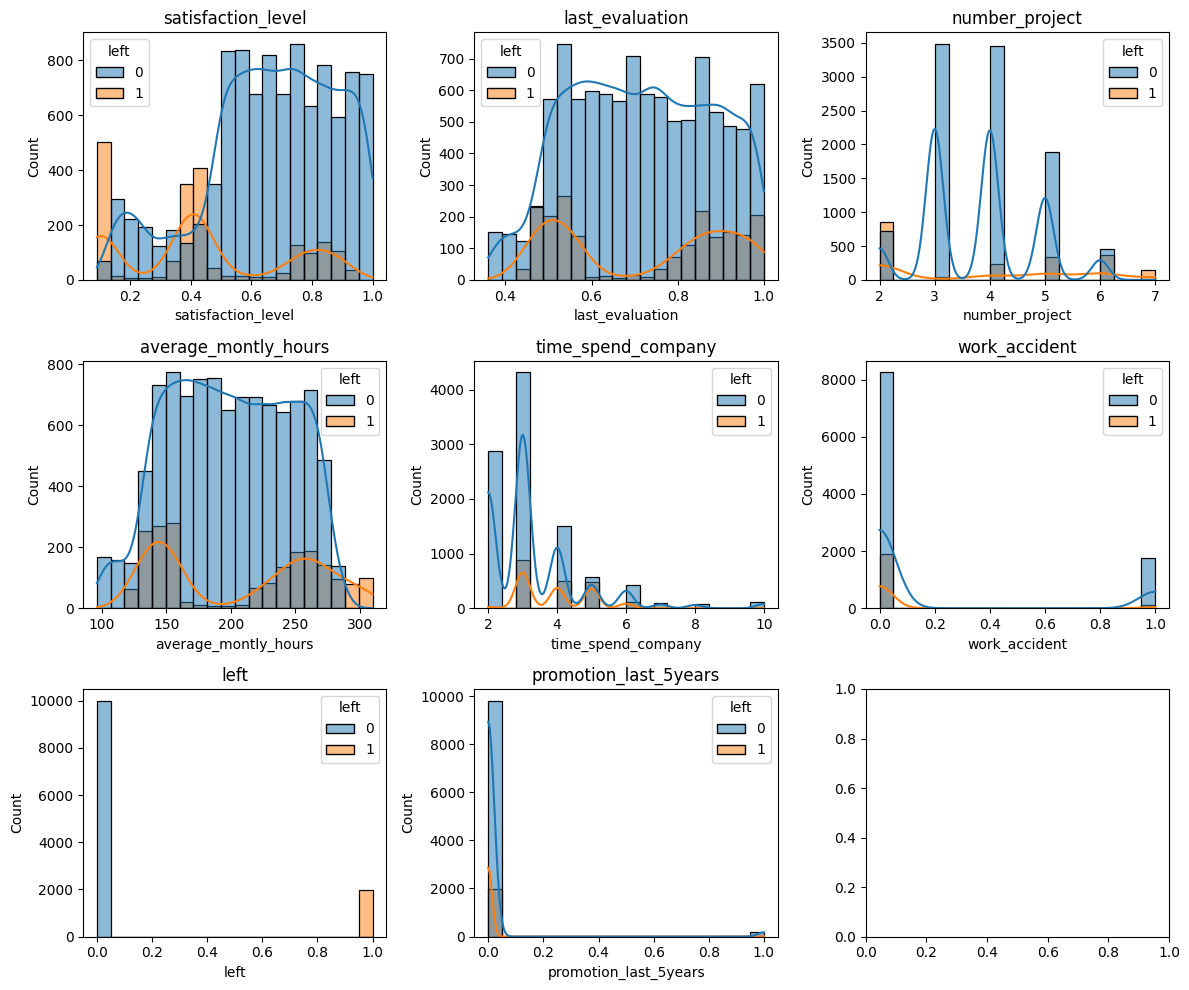

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

axes = axes.flatten()

# Iterate through each column and plot a histogram in the corresponding subplot
for i, column in enumerate(df.select_dtypes('number').columns):
    ax = axes[i]
    sns.histplot(data=df, x=column, bins=20,hue='left', kde=True, ax=ax) 
    ax.set_title(column)
    
plt.tight_layout()

**COMMENT**

+ **satisfaction_level:** The ones with a satisfaction level of 1 are generally clustered in three places: 0, 0.4, and 0.8. Therefore, they can be divided into 3 or 4 categories.
+ **last_evaluation:** The ones with a last evaluation score of 1 are predominantly in the ranges of 0.4-0.6 and 0.8-1.0.
+ **number_project:** The ones with a number of projects equal to 1 are concentrated at 2 and 7, while there are very few at 3.
+ **average_monthly_hours:** The ones with a number of projects equal to 1 show high density in the ranges of 120-160 and 210-290.
+ **time_spend_company:** The ones with a time spent in the company equal to 1 are concentrated at 3, 4, and 5.

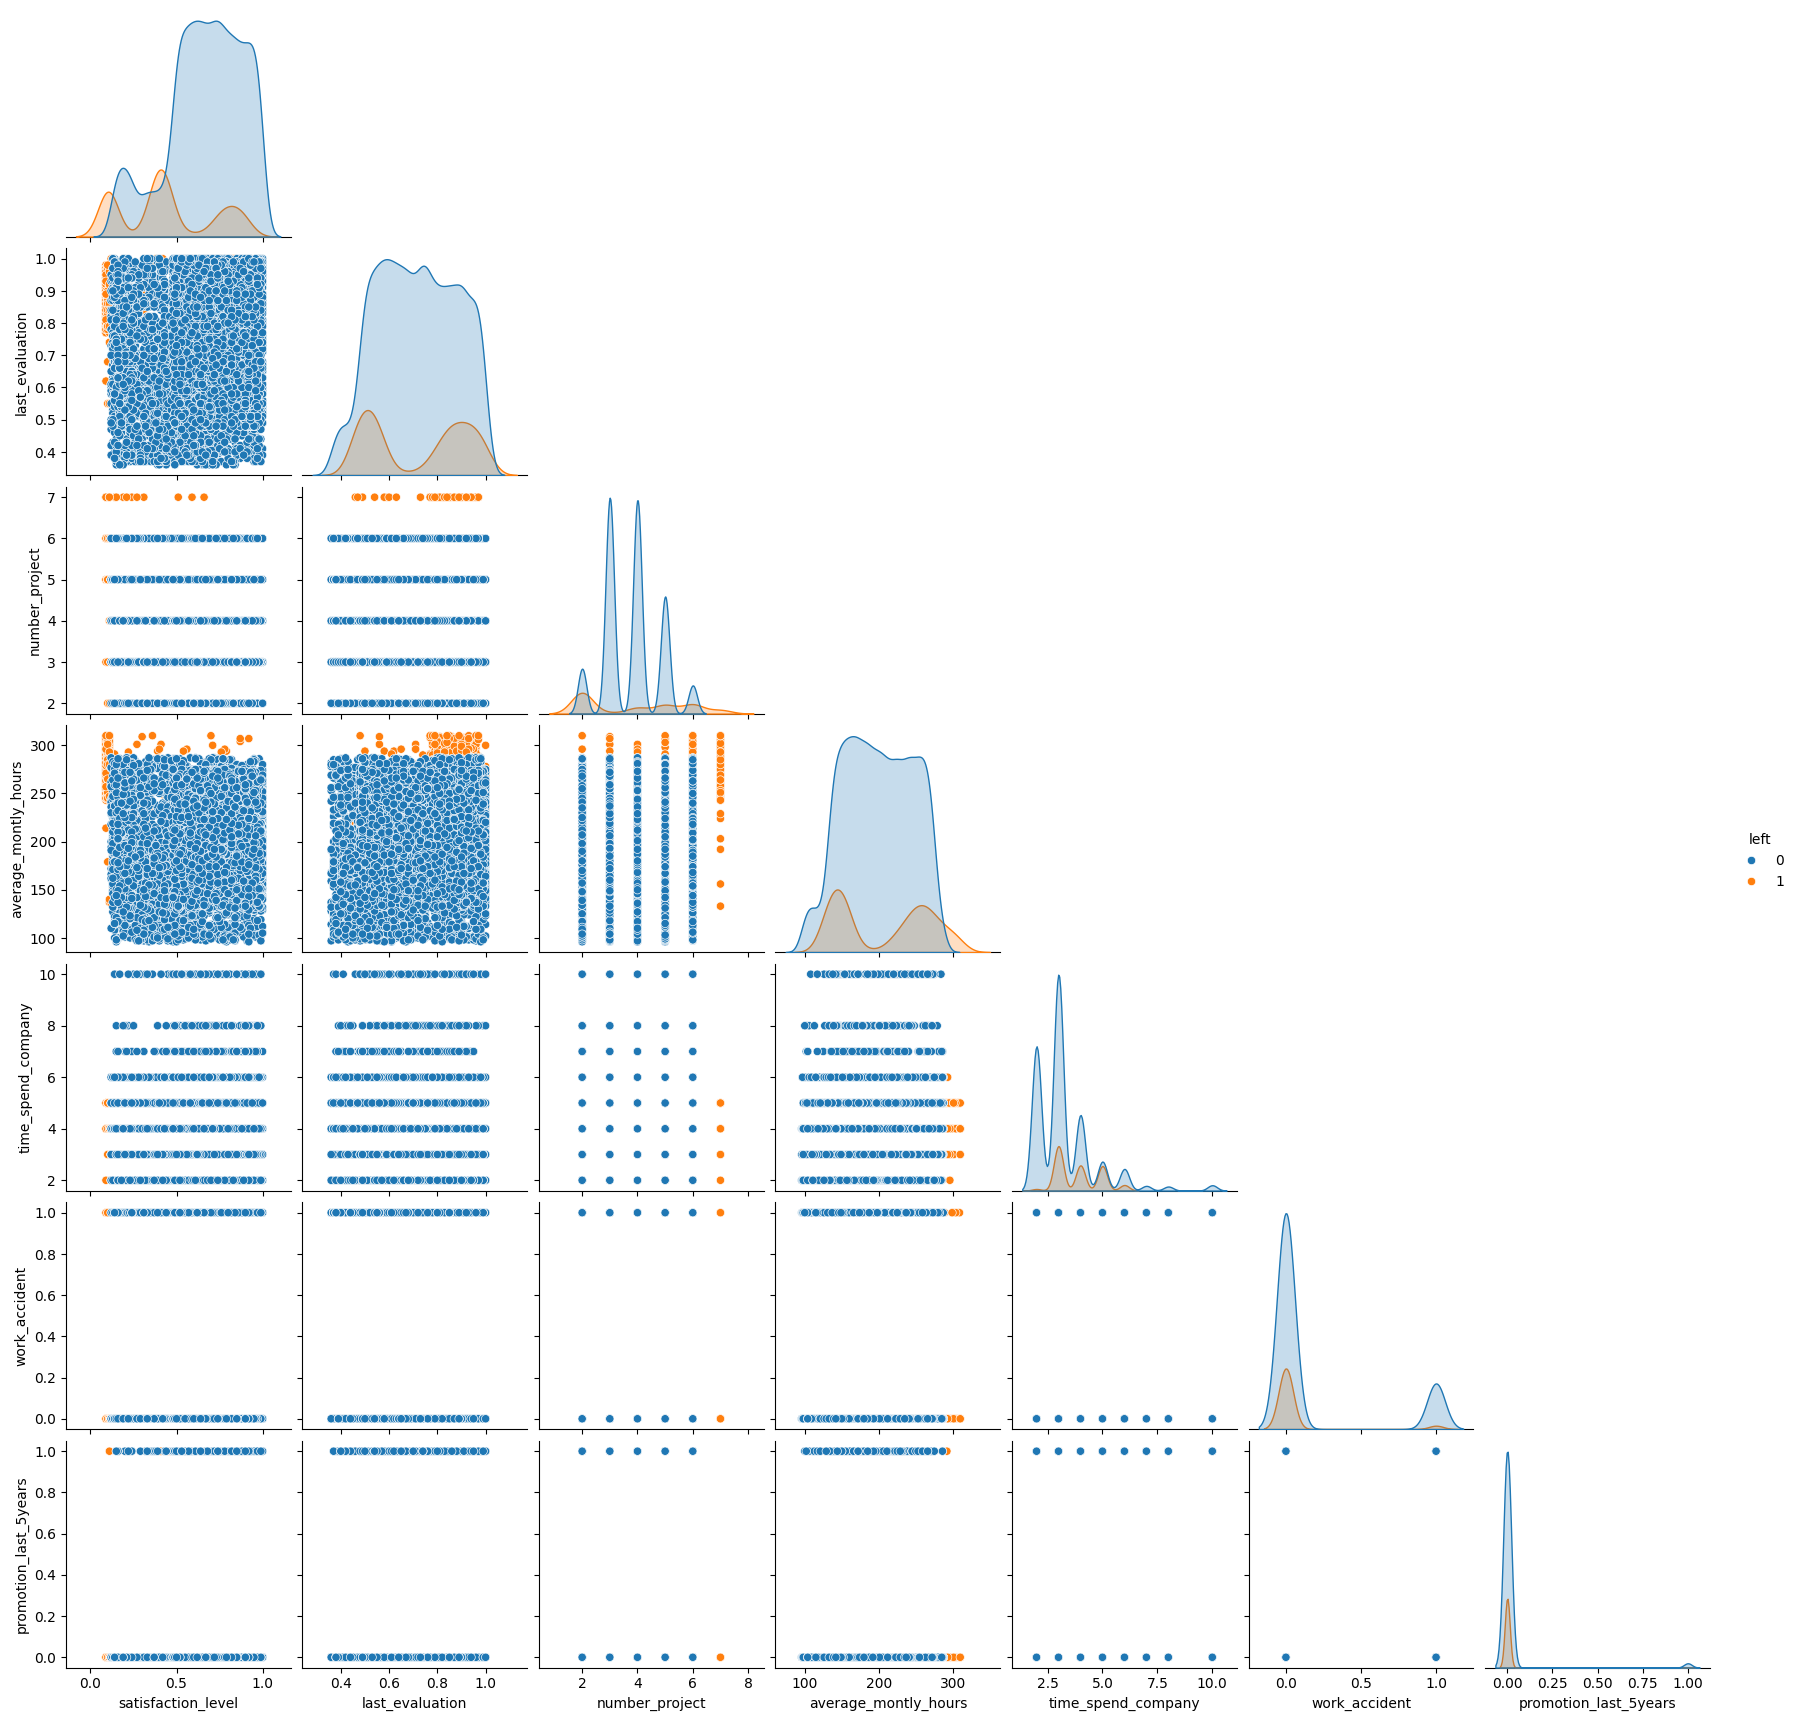

In [17]:
sns.pairplot(df, corner=True, hue='left')
plt.show()

### Target Feature : Left

We will classify whether the employee has left the company or not. Therefore our target is 'left' feature.

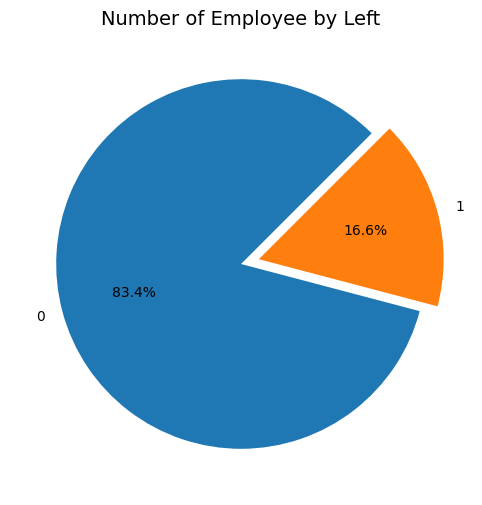

In [18]:
plt.pie(df.left.value_counts(), labels=df.left.value_counts().index, autopct='%1.1f%%', startangle=45, explode=(0,0.1))
plt.title('Number of Employee by Left', size=14)
plt.show()

In [19]:
# ax = sns.countplot(x = 'left', data=df)
# ax.bar_label(ax.containers[0]);

### satisfaction_level

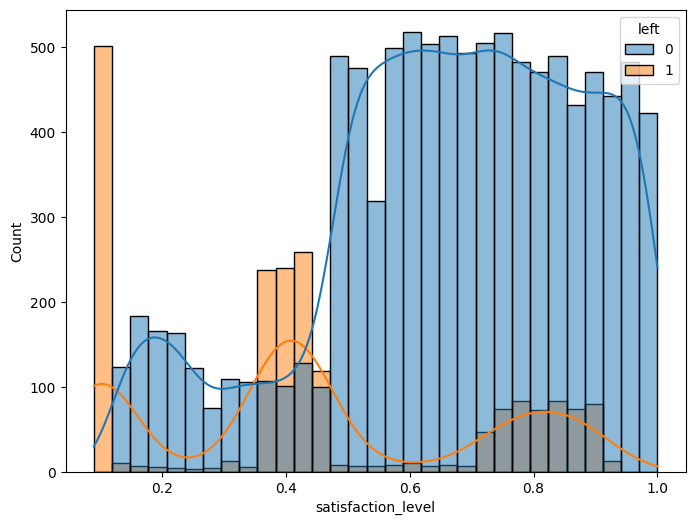

In [21]:
sns.histplot(data=df, x= 'satisfaction_level',hue='left',kde=True);

In [22]:
# sns.swarmplot(x='left', y='satisfaction_level', data=df)
# plt.show()

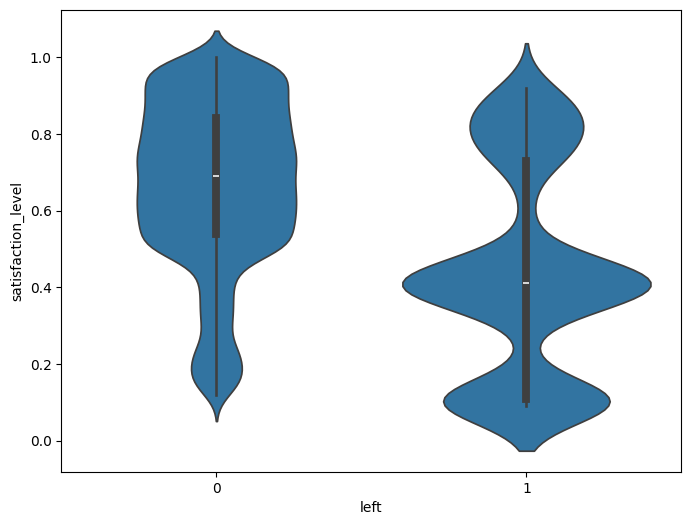

In [23]:
sns.violinplot(x='left', y='satisfaction_level', data=df)
plt.show()

**COMMENT**

+ **satisfaction_level:** The ones with a satisfaction level of 1 are generally clustered in three places: 0.1, 0.4, and 0.9. Therefore, they can be divided into 3 or 4 categories. 
+ On the other hand, 0's are concentrated after 0.45. Those with high satisfaction_level are more likely to not quit their job.

### last_evaluation

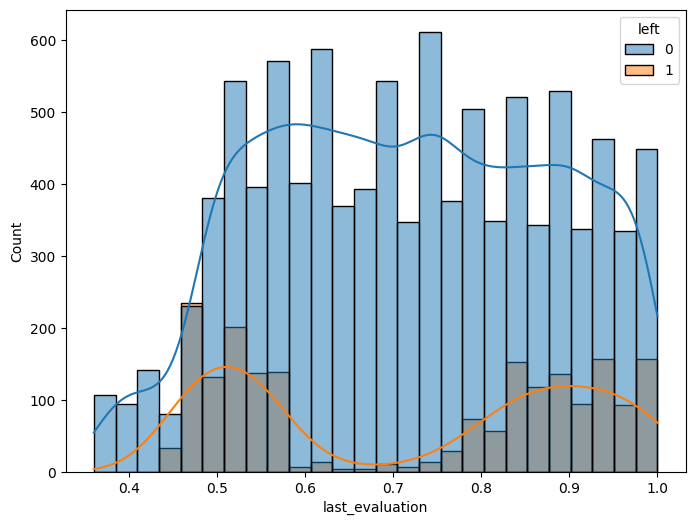

In [24]:
sns.histplot(data=df, x= 'last_evaluation',hue='left',kde=True);

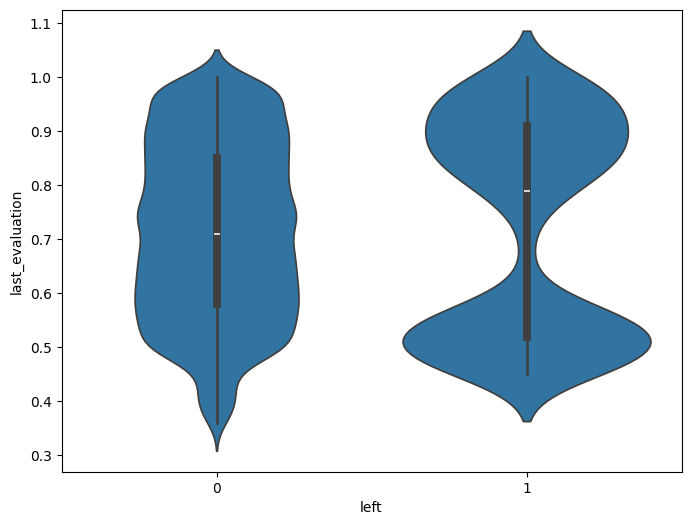

In [25]:
sns.violinplot(x='left', y='last_evaluation', data=df)
plt.show()

**COMMENT**

+ **last_evaluation:** The ones with a last evaluation score of 1 are predominantly in the ranges of 0.4-0.6 and 0.8-1.0. 
+ On the other hand, 0's are concentrated between 0.49-1.0.
+ Someone whose last_evaluation is between 0-0.4 is more likely to not quit.

### number_projects

In [26]:
# ax = sns.countplot(data=df, x= 'number_project',hue='left')
# ax.bar_label(ax.containers[0])
# ax.bar_label(ax.containers[1]);

In [27]:
# ax = df.groupby('number_project')['left'].value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)
# for i in ax.containers:
#     ax.bar_label(i, fmt='%.2f');

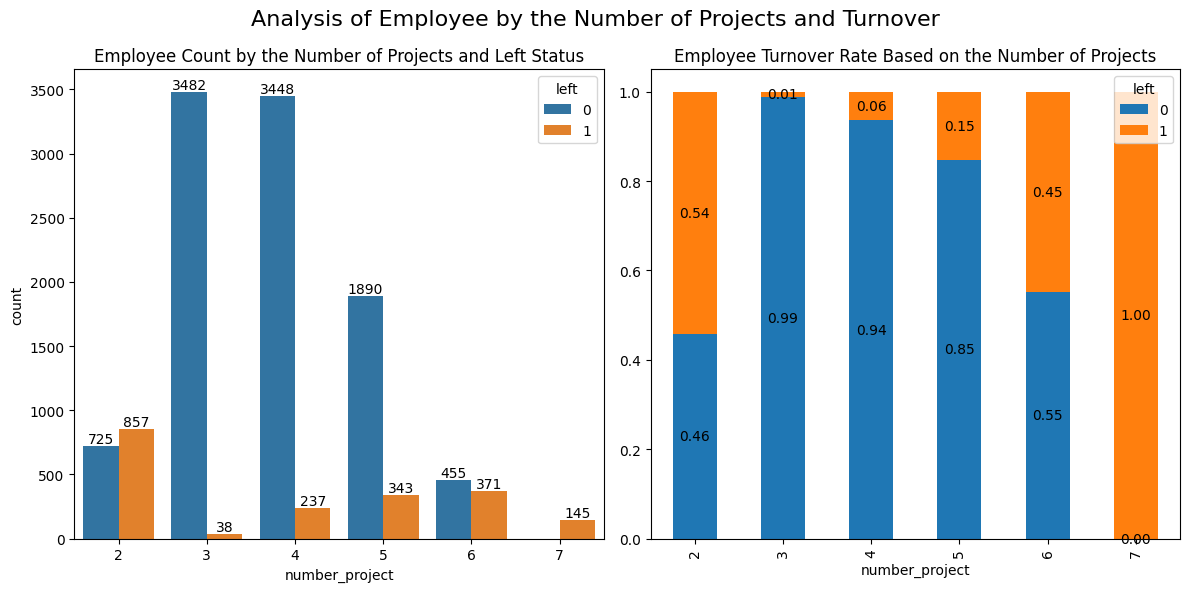

In [29]:
plt.figure(figsize=(12, 6))

# Subplot 1
plt.subplot(1, 2, 1)
plt.title('Employee Count by the Number of Projects and Left Status', size=12)
ax1 = sns.countplot(x='number_project', data=df, hue='left')
for i in ax1.containers:
    ax1.bar_label(i)


# Subplot 2
ax2 = plt.subplot(1, 2, 2)
df.groupby('number_project')['left'].value_counts(normalize=True).unstack().plot(kind='bar',stacked=True, ax=ax2)
# for i in ax2.containers:
#     ax2.bar_label(i, fmt='%.2f',fontsize=8)
plt.title('Employee Turnover Rate Based on the Number of Projects', size=12)
for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax2.text(x + width/2, y + height/2, f'{height:.2f}', ha='center', va='center', fontsize=10,color='k')

# Overall Title
plt.suptitle('Analysis of Employee by the Number of Projects and Turnover', size=16)

plt.tight_layout()
plt.show()

**COMMENT**
+ Those who have 7 projects quit their work.
+ 99 % of Employees who have 3 projects do not quit.
+ 94 % of Employees who have 4 projects do not quit.
+ 85 % of Employees who have 5 projects do not quit.
+ Employees with 2 or 6 projects have similar retention or quit rates.
+ Employees who start doing more than 3 projects are more likely to quit. After 3, the employee should be followed well.

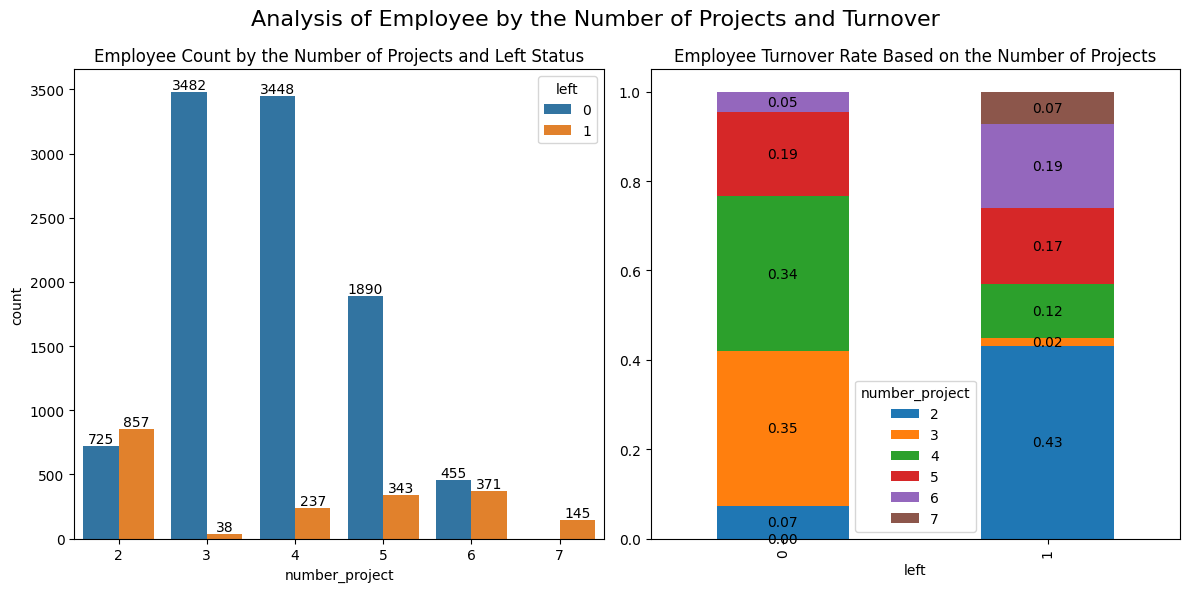

In [30]:
plt.figure(figsize=(12, 6))

# Subplot 1
plt.subplot(1, 2, 1)
plt.title('Employee Count by the Number of Projects and Left Status', size=12)
ax1 = sns.countplot(x='number_project', data=df, hue='left')
for i in ax1.containers:
    ax1.bar_label(i)


# Subplot 2
ax2 = plt.subplot(1, 2, 2)
df.groupby('left')['number_project'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, ax=ax2)
# for i in ax2.containers:
#     ax2.bar_label(i, fmt='%.2f')
plt.title('Employee Turnover Rate Based on the Number of Projects', size=12)
for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax2.text(x + width/2, y + height/2, f'{height:.2f}', ha='center', va='center', fontsize=10,color='k')

# Overall Title
plt.suptitle('Analysis of Employee by the Number of Projects and Turnover', size=16)

plt.tight_layout()
plt.show()

**COMMENT**
+ 43 % of 1 consist of employees who has 2 projects.
+ 35 % of 0 consist of employees who has 3 projects.
+ 34 % of 0 consist of employees who has 4 projects.

### average_monthly_hours

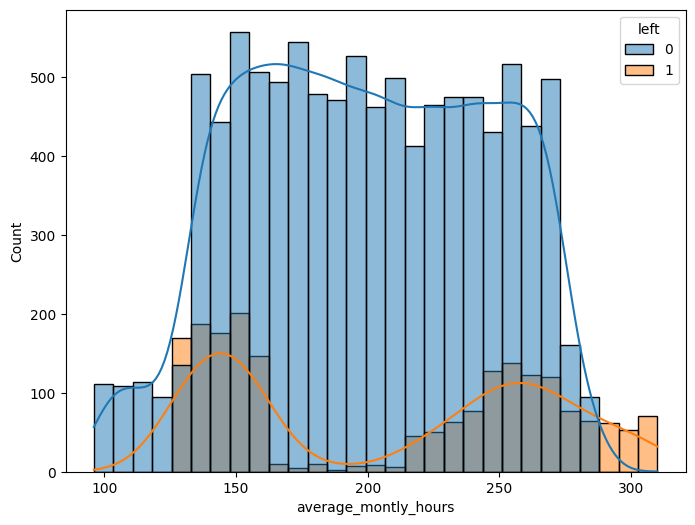

In [31]:
sns.histplot(data=df, x= 'average_montly_hours',hue='left',kde=True);

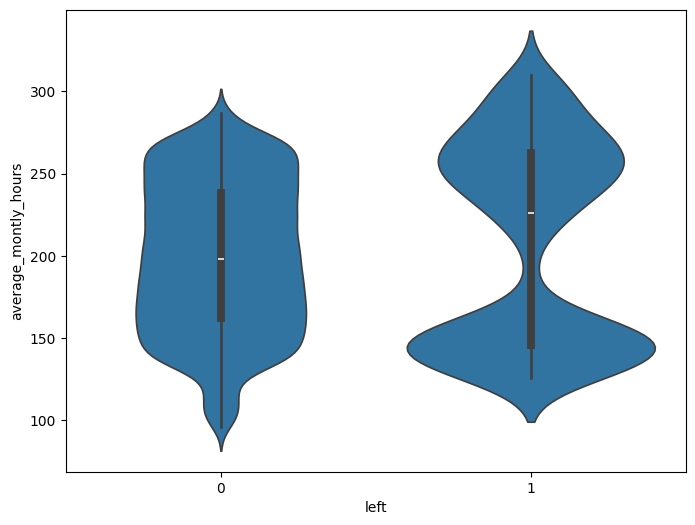

In [32]:
sns.violinplot(x='left', y='average_montly_hours', data=df)
plt.show()

In [33]:
df.average_montly_hours.min()

96

In [34]:
df.average_montly_hours.max()

310

In [35]:
df[df.left==0].average_montly_hours.max()

287

In [36]:
df[df.left==1].average_montly_hours.min()

126

**COMMENT**
+ **average_monthly_hours:** 
+ The left Employees show high density in the ranges of 119-157 and 213-310.
+ The stayed Employees show high density in the range of 125-275.
+ Those who work more than 287 hours a month  quit.
+ Those who work less than 126 hours a month do not quit.

### time_spend_company

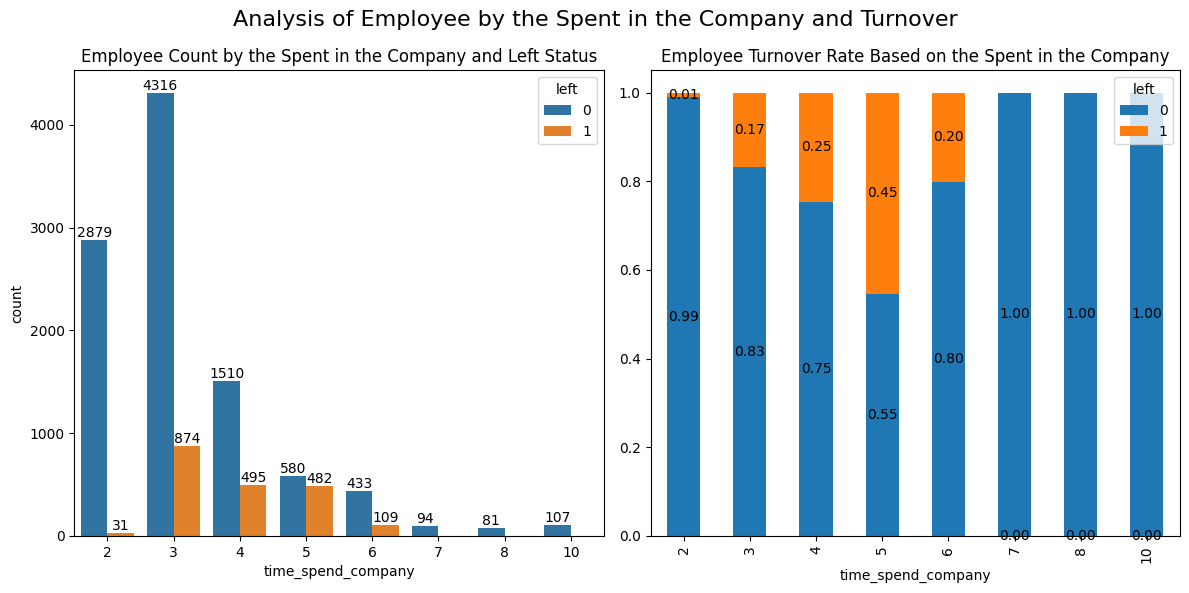

In [37]:
plt.figure(figsize=(12, 6))

# Subplot 1
plt.subplot(1, 2, 1)
plt.title('Employee Count by the Spent in the Company and Left Status', size=12)
ax1 = sns.countplot(x='time_spend_company', data=df, hue='left')
for i in ax1.containers:
    ax1.bar_label(i)


# Subplot 2
ax2 = plt.subplot(1, 2, 2)
df.groupby('time_spend_company')['left'].value_counts(normalize=True).unstack().plot(kind='bar',stacked=True, ax=ax2)
for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax2.text(x + width/2, y + height/2, f'{height:.2f}', ha='center', va='center', fontsize=10,color='k')
plt.title('Employee Turnover Rate Based on the Spent in the Company', size=12)


# Overall Title
plt.suptitle('Analysis of Employee by the Spent in the Company and Turnover', size=16)

plt.tight_layout()
plt.show()

**COMMENT**
+ **time_spend_company:**
+ Employees with 7 or more working time spent in the company do not quit.
+ Those who quit mostly spent 3,4,5 and 6 working time in the company.
+ 99% of the employees who has 2 time_spent_company do not quit their jobs.
+ 100% of the employees who has 7,8 or 10 time_spent_company do not quit their jobs. That means, long-time employees stay.
+ 83% of the employees who has 3 time_spent_company do not quit their jobs.
+ 80% of the employees who has 6 time_spent_company do not quit their jobs.
+ 75% of the employees who has 4 time_spent_company do not quit their jobs.
+ Only 45% of the employees who has 5 time_spent_company quit their jobs. That is, medium-term employees tend to quit.


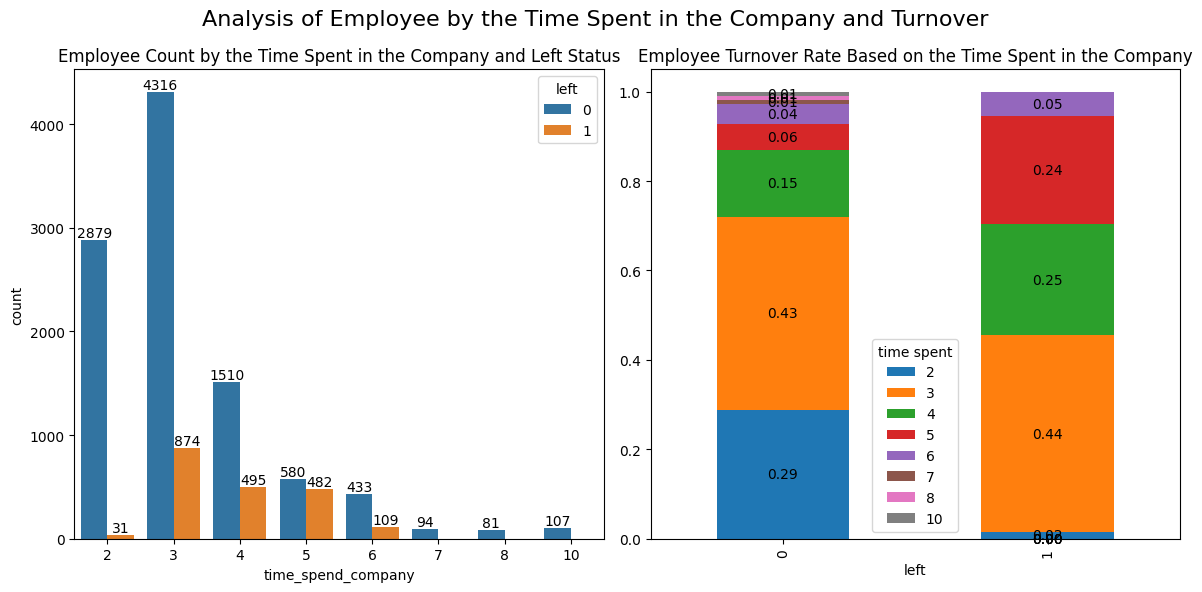

In [38]:
plt.figure(figsize=(12, 6))

# Subplot 1
plt.subplot(1, 2, 1)
plt.title('Employee Count by the Time Spent in the Company and Left Status', size=12)
ax1 = sns.countplot(x='time_spend_company', data=df, hue='left')
for i in ax1.containers:
    ax1.bar_label(i)


# Subplot 2
sns.set_palette("tab10")
ax2 = plt.subplot(1, 2, 2)
df.groupby('left')['time_spend_company'].value_counts(normalize=True).unstack().plot(kind='bar',stacked=True, ax=ax2)
for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax2.text(x + width/2, y + height/2, f'{height:.2f}', ha='center', va='center', fontsize=10,color='k')
ax2.legend(loc='lower center',title='time spent')

plt.title('Employee Turnover Rate Based on the Time Spent in the Company', size=12)


# Overall Title
plt.suptitle('Analysis of Employee by the Time Spent in the Company and Turnover', size=16)

plt.tight_layout()
plt.show()

**COMMENT**
+ 43% of employees who do **not** quit have 3 time_time_spent
+ 29% of employees who do **not** quit have 2 time_time_spent
+ 15% of employees who do **not** quit have 4 time_time_spent
+ 44% of employees who quit have 3 time_time_spent
+ 25% of employees who quit have 4 time_time_spent
+ 24% of employees who quit have 5 time_time_spent

### work_accident

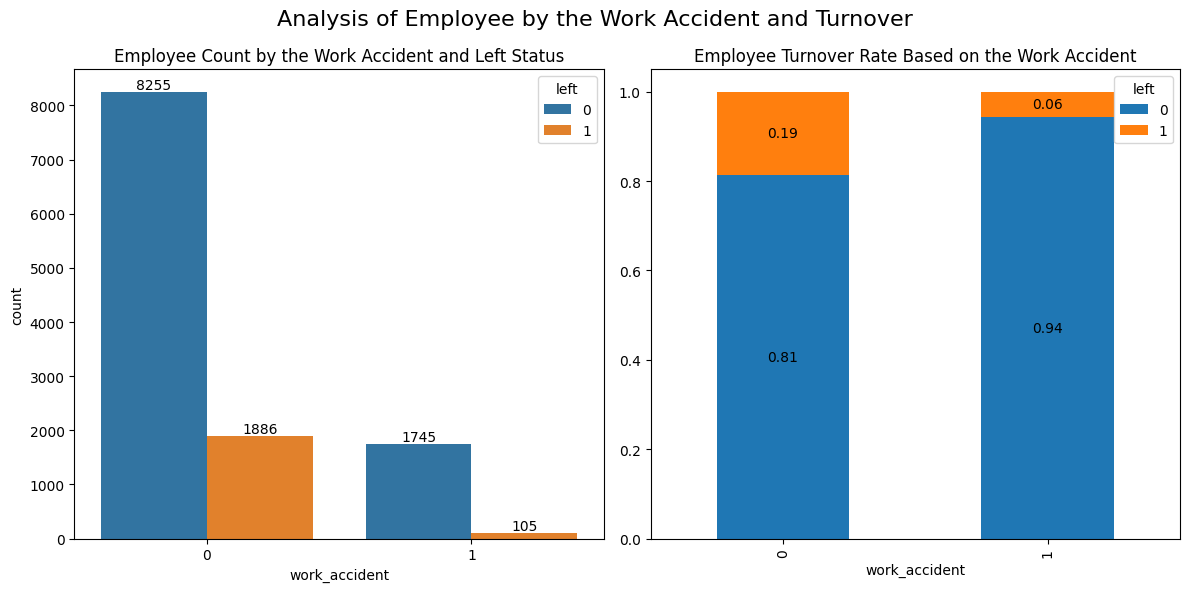

In [43]:
plt.figure(figsize=(12, 6))

# Subplot 1
plt.subplot(1, 2, 1)
plt.title('Employee Count by the Work Accident and Left Status', size=12)
ax1 = sns.countplot(x='work_accident', data=df, hue='left')
for i in ax1.containers:
    ax1.bar_label(i)


# Subplot 2
ax2 = plt.subplot(1, 2, 2)
df.groupby('work_accident')['left'].value_counts(normalize=True).unstack().plot(kind='bar',stacked=True, ax=ax2)
for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax2.text(x + width/2, y + height/2, f'{height:.2f}', ha='center', va='center', fontsize=10,color='k')
plt.title('Employee Turnover Rate Based on the Work Accident', size=12)


# Overall Title
plt.suptitle('Analysis of Employee by the Work Accident and Turnover', size=16)

plt.tight_layout()
plt.show()

**COMMENT**
+ 81% of employees who do **not** have work accident stay.
+ 94% of employees who have work accident stay.
+ Therefore, work accident does not affect churn.

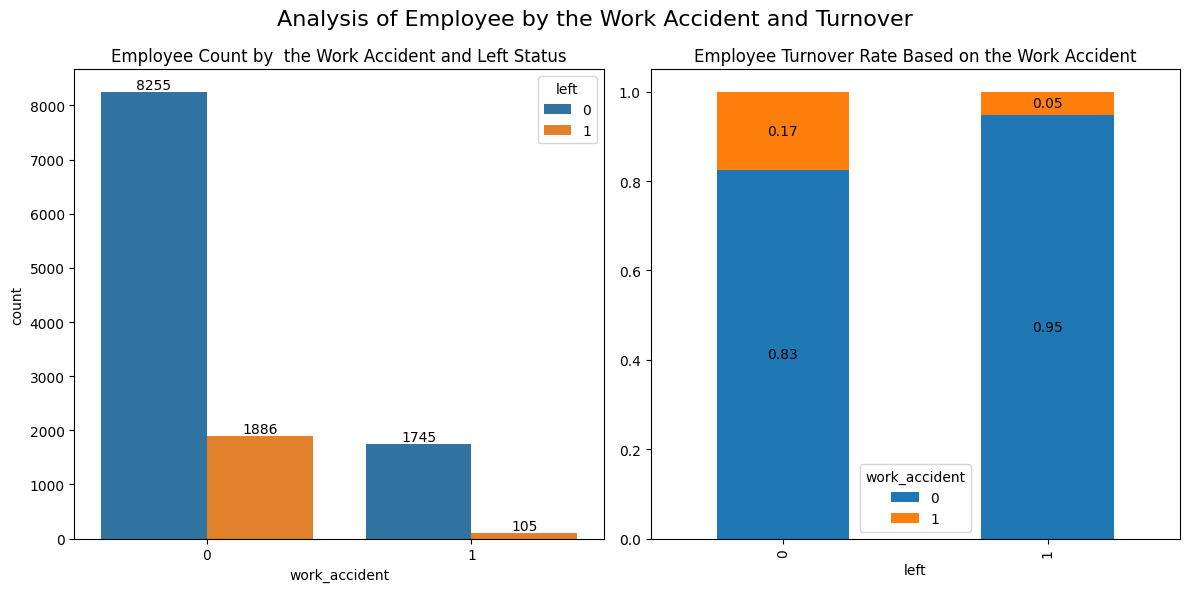

In [42]:
plt.figure(figsize=(12, 6))

# Subplot 1
plt.subplot(1, 2, 1)
plt.title('Employee Count by  the Work Accident and Left Status', size=12)
ax1 = sns.countplot(x='work_accident', data=df, hue='left')
for i in ax1.containers:
    ax1.bar_label(i)


# Subplot 2
ax2 = plt.subplot(1, 2, 2)
df.groupby('left')['work_accident'].value_counts(normalize=True).unstack().plot(kind='bar',stacked=True, ax=ax2)
for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax2.text(x + width/2, y + height/2, f'{height:.2f}', ha='center', va='center', fontsize=10,color='k')
plt.title('Employee Turnover Rate Based on the Work Accident', size=12)


# Overall Title
plt.suptitle('Analysis of Employee by the Work Accident and Turnover', size=16)

plt.tight_layout()
plt.show()

**COMMENT**
+ 17% of employees who stay have work accident
+ 5% of employees who stay have work accident
+ A work accident cannot be a reason to quit.

### promotion_last_5years

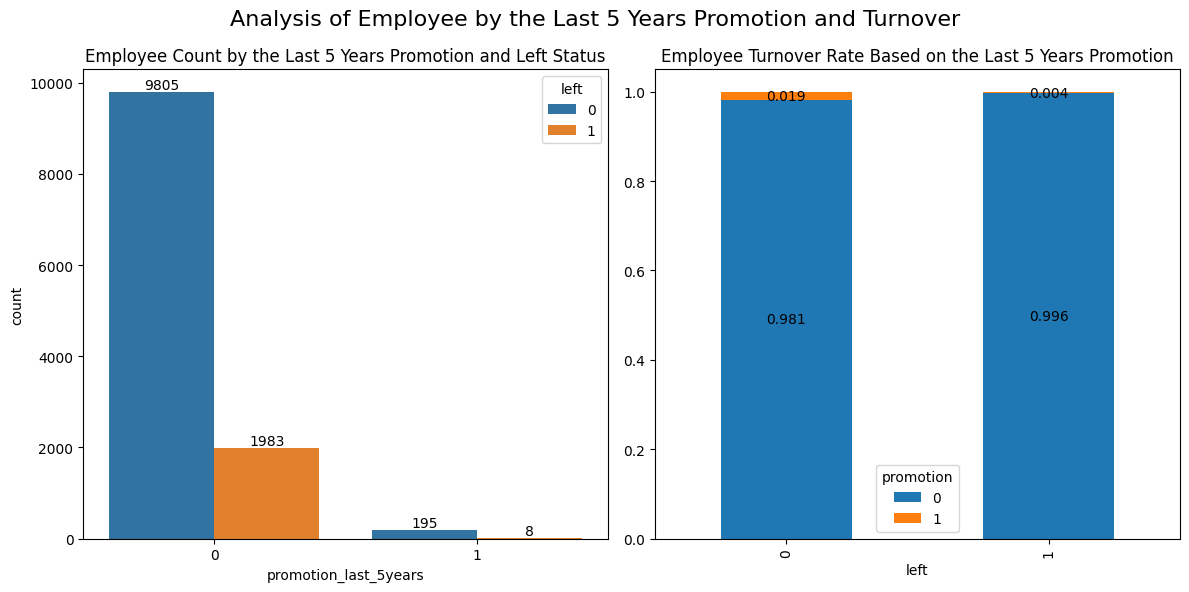

In [44]:
plt.figure(figsize=(12, 6))

# Subplot 1
plt.subplot(1, 2, 1)
plt.title('Employee Count by the Last 5 Years Promotion and Left Status', size=12)
ax1 = sns.countplot(x='promotion_last_5years', data=df, hue='left')
for i in ax1.containers:
    ax1.bar_label(i)


# Subplot 2
ax2 = plt.subplot(1, 2, 2)
df.groupby('left')['promotion_last_5years'].value_counts(normalize=True).unstack().plot(kind='bar',stacked=True, ax=ax2)
for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax2.text(x + width/2, y + height/2, f'{height:.3f}', ha='center', va='center', fontsize=10,color='k')
plt.title('Employee Turnover Rate Based on the Last 5 Years Promotion', size=12)
ax2.legend(loc='lower center',title='promotion')

# Overall Title
plt.suptitle('Analysis of Employee by the Last 5 Years Promotion and Turnover', size=16)

plt.tight_layout()
plt.show()

**COMMENT**
+ 1.9% of employees who stay have promotion last 5 years.
+ 0.4% of employees who quit  have promotion last 5 years.
+ Promotion can be a reason to stay.

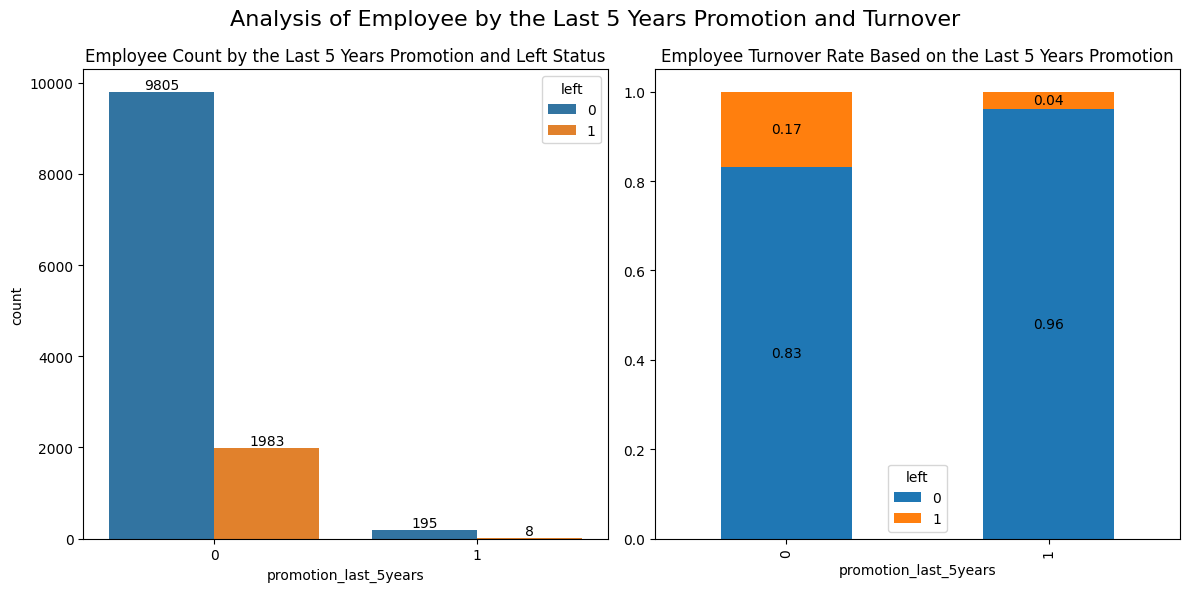

In [45]:
plt.figure(figsize=(12, 6))

# Subplot 1
plt.subplot(1, 2, 1)
plt.title('Employee Count by the Last 5 Years Promotion and Left Status', size=12)
ax1 = sns.countplot(x='promotion_last_5years', data=df, hue='left')
for i in ax1.containers:
    ax1.bar_label(i)


# Subplot 2
ax2 = plt.subplot(1, 2, 2)
df.groupby('promotion_last_5years')['left'].value_counts(normalize=True).unstack().plot(kind='bar',stacked=True, ax=ax2)
for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax2.text(x + width/2, y + height/2, f'{height:.2f}', ha='center', va='center', fontsize=10,color='k')
plt.title('Employee Turnover Rate Based on the Last 5 Years Promotion', size=12)


# Overall Title
plt.suptitle('Analysis of Employee by the Last 5 Years Promotion and Turnover', size=16)

plt.tight_layout()
plt.show()

**COMMENT**
+ 17% of employees who do **not** have promotion last 5 years quit .
+ 4% of employees who have promotion last 5 years quit.
+ This could imply that promotions can have a impact on retention for employees.

### Departments

In [46]:
pd.crosstab(df['left'],df['departments'])

departments   IT  RandD  accounting   hr  management  marketing  product_mng  \
left                                                                           
0            818    609         512  488         384        561          576   
1            158     85         109  113          52        112          110   

departments  sales  support  technical  
left                                    
0             2689     1509       1854  
1              550      312        390

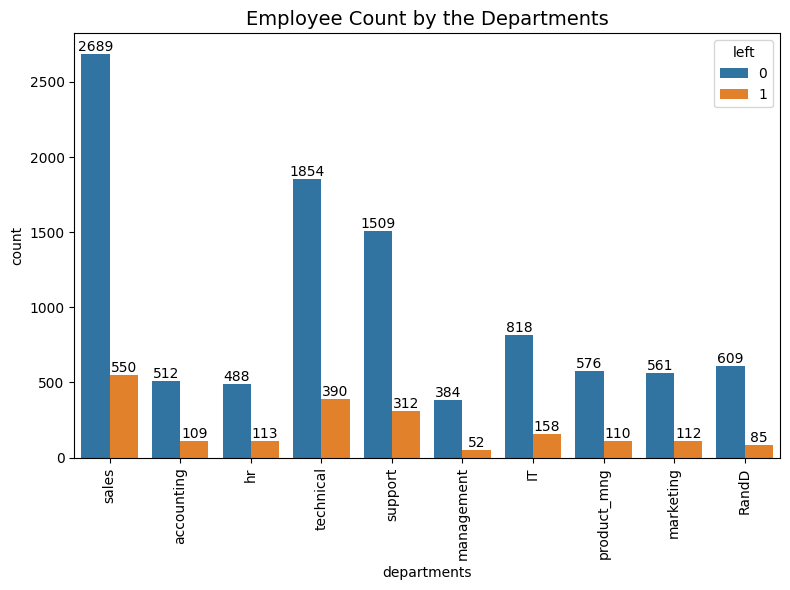

In [47]:
# Churn count department

ax = sns.countplot(x='departments',data=df,hue='left')
for i in ax.containers:
    ax.bar_label(i)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.title('Employee Count by the Departments',fontsize=14)
plt.tight_layout();

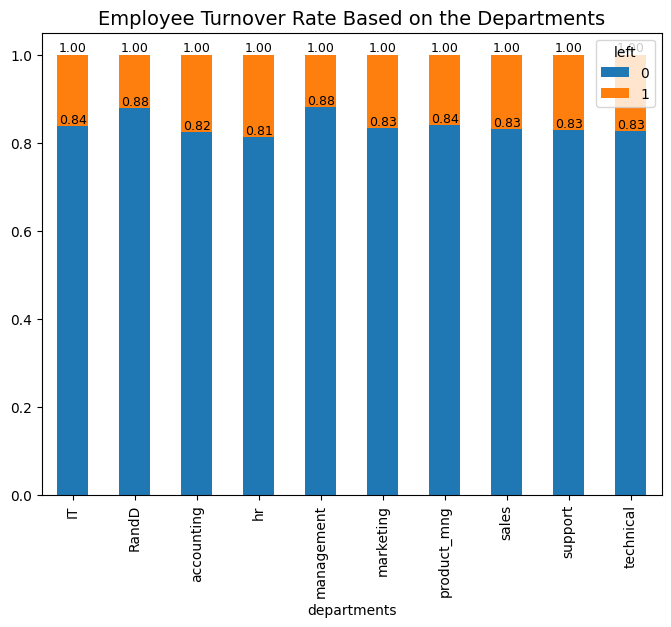

In [48]:
# Churn rate pro department

ax = df.groupby('departments')['left'].value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f',fontsize=9)
plt.title('Employee Turnover Rate Based on the Departments',fontsize=14);

**COMMENT**

+ The overall turnover rates across all departments are relatively similar. 
+ Therefore, this feature may not be highly impactful in our analysis.

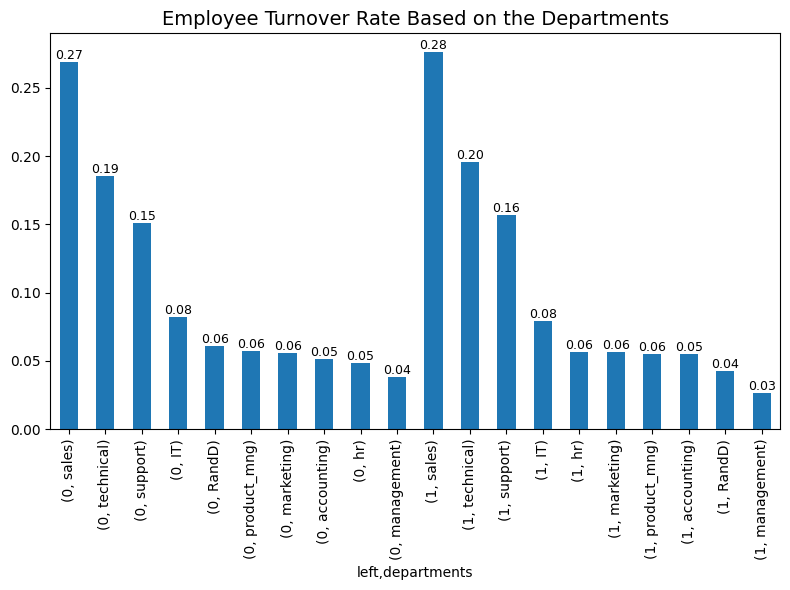

In [49]:
# department rate pro left

ax = df.groupby('left')['departments'].value_counts(normalize=True).plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i, fmt='%.2f',fontsize=9)
plt.title('Employee Turnover Rate Based on the Departments',fontsize=14);
plt.tight_layout();

### Salary

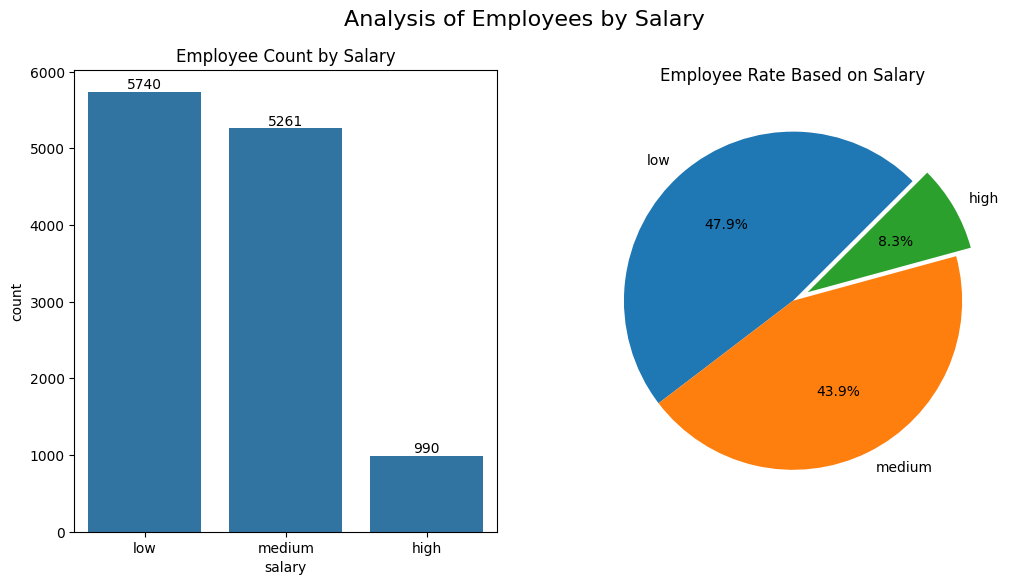

In [51]:
plt.figure(figsize=(12, 6))

# Subplot 1
plt.subplot(1, 2, 1)
plt.title('Employee Count by Salary', size=12)
ax1 = sns.countplot(x='salary', data=df)
ax1.bar_label(ax1.containers[0])

ax2 = plt.subplot(1, 2, 2)
plt.pie(df.salary.value_counts(), labels=df.salary.value_counts().index, autopct='%1.1f%%', startangle=45, explode=(0, 0, 0.1))
plt.title('Employee Rate Based on Salary', size=12)
plt.suptitle('Analysis of Employees by Salary',size=16)
plt.show()

**COMMENT**

+ 8.3% of employees receiving high salary
+ 43.9% of employees receiving medium salary
+ 47.9% of employees receiving low salary

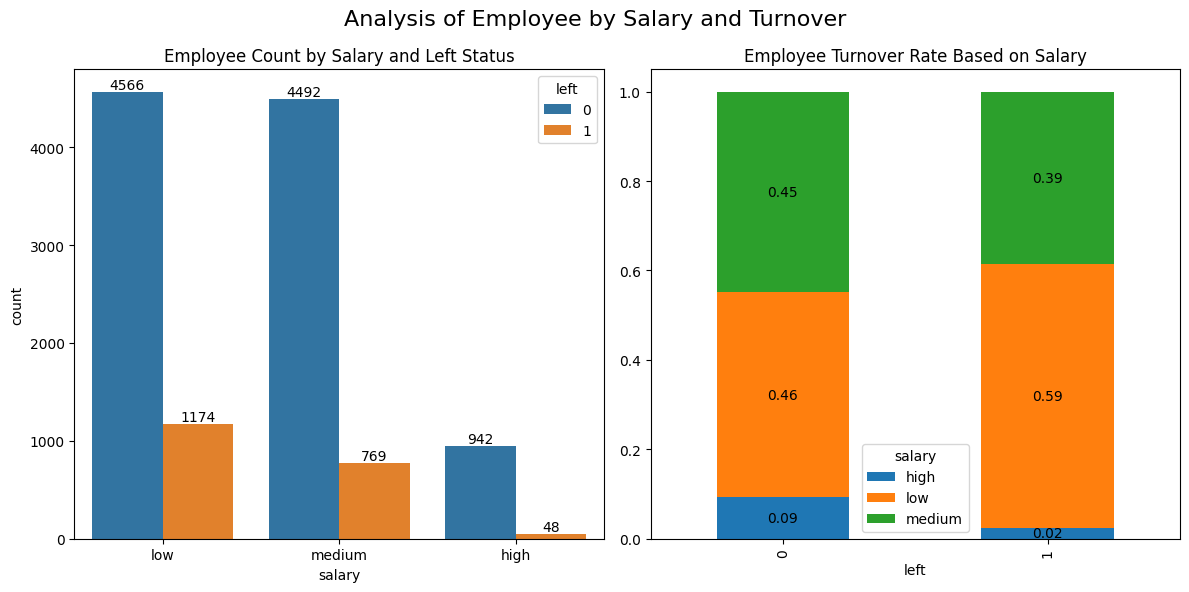

In [52]:
plt.figure(figsize=(12, 6))

# Subplot 1
plt.subplot(1, 2, 1)
plt.title('Employee Count by Salary and Left Status', size=12)
ax1 = sns.countplot(x='salary', data=df, hue='left')
for i in ax1.containers:
    ax1.bar_label(i)


# Subplot 2
ax2 = plt.subplot(1, 2, 2)
df.groupby('left')['salary'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True, ax=ax2)
for p in ax2.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax2.text(x + width/2, y + height/2, f'{height:.2f}', ha='center', va='center', fontsize=10,color='k')
plt.title('Employee Turnover Rate Based on Salary', size=12)

# Overall Title
plt.suptitle('Analysis of Employee by Salary and Turnover', size=16)

plt.tight_layout()
plt.show()

**COMMENT**

+ 46% of employees who stay have a low salary, while 59% of employees who quit have a low salary.
+ 45% of employees who stay have a medium salary, while 39% of employees who quit have a medium salary.
+ 39% of employees who quit have a medium salary.
+ 9% of employees who stay have a high salary, while 2% of employees who quit have a high salary. 
+ Thus, those with low salaries tend to quit.

In [ ]:
# # employee number pro salary
# ax = sns.countplot(x='salary',data=df,hue='left')
# for i in ax.containers:
#     ax.bar_label(i)
#     ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
# plt.tight_layout();

In [ ]:
# ax = df.groupby('left')['salary'].value_counts(normalize=True).unstack().plot(kind='bar', stacked=True)
# for i in ax.containers:
#     ax.bar_label(i,fmt='%.2f')
# plt.title('Employee Turnover Rate Based on Salary', size=14);

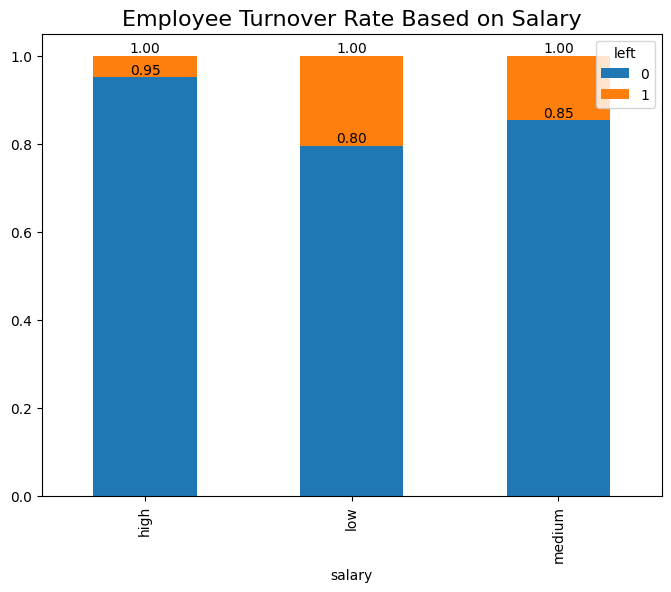

In [54]:
ax = df.groupby('salary')['left'].value_counts(normalize=True).unstack().plot(kind='bar',stacked=True)
for i in ax.containers:
    ax.bar_label(i,fmt='%.2f')
plt.title('Employee Turnover Rate Based on Salary', size=16);

**COMMENT**

+ Employees with high salaries are more likely to stay, while employees with low salaries are less likely to stay.

In [ ]:
### Departments vs Salary

In [ ]:
# ax = sns.countplot(x='salary',hue='departments',data=df)
# for i in ax.containers:
#     ax.bar_label(i,fontsize=7.5)
# plt.tight_layout();

In [ ]:
# df.groupby('salary')['departments'].value_counts().unstack().plot(kind='bar')

### Outliers

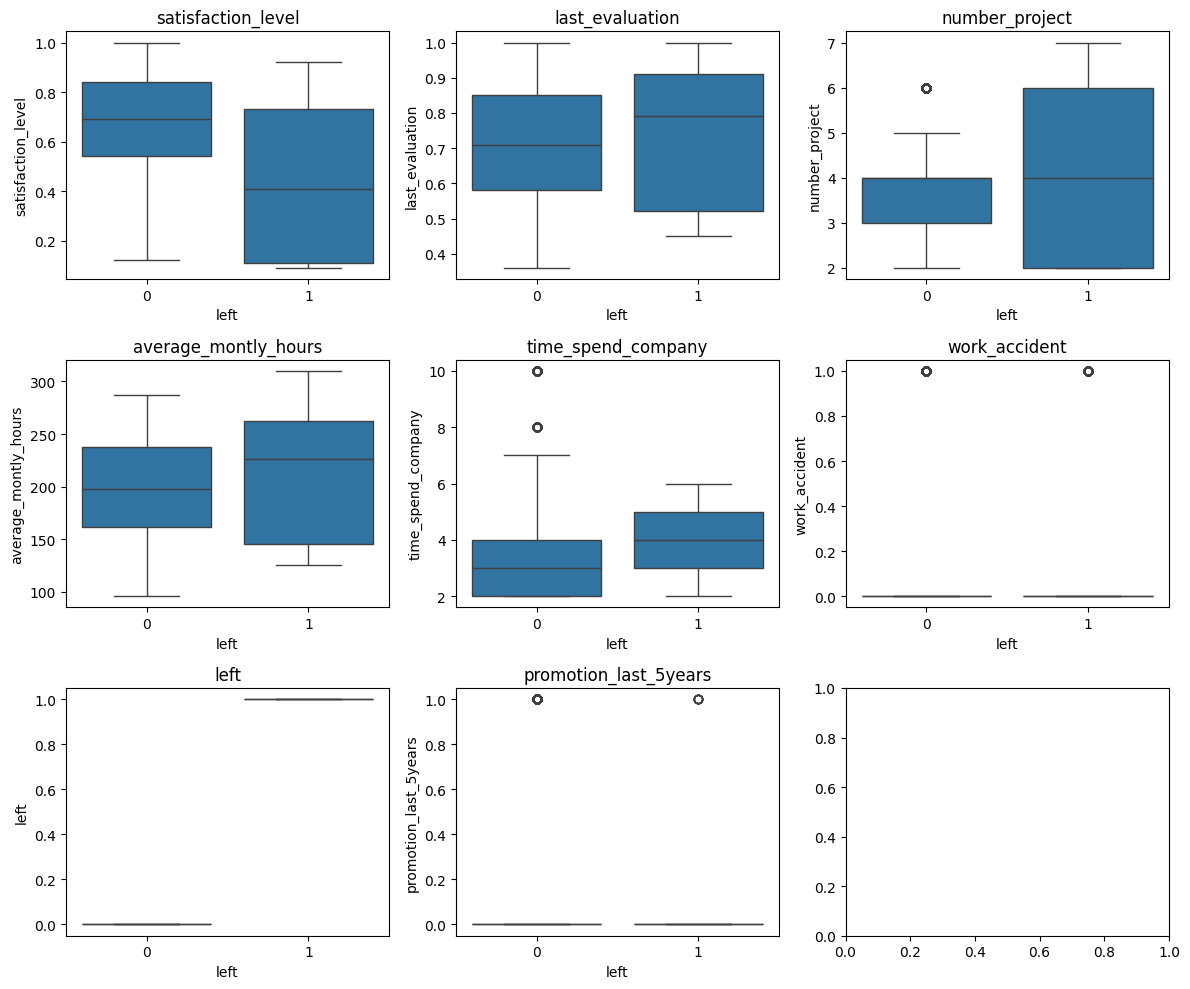

In [56]:
fig, axes = plt.subplots(3, 3, figsize=(12, 10))

axes = axes.flatten()

# Iterate through each column and plot a histogram in the corresponding subplot
for i, column in enumerate(df.select_dtypes('number').columns):
    ax = axes[i]
    sns.boxplot(data=df, y=column,x='left', ax=ax) 
    ax.set_title(column)
    
plt.tight_layout()

**COMMENT**
+ Outliers appear in number_project and time_spend_company features.
+ Employees who stay have a higher average satisfaction_level.
+ Employees who stay have mostly less than 6 projects.
+ Employees who quit have have a higher average time_spend_company.

##### Examination of Outlier values
**Note**: I have created models both with and without dropping the outlier values. I will not drop the outliers in the following models since the result does not change much.

In [57]:
df[(df.left==0)&(df.number_project>5)].describe()

satisfaction_level  last_evaluation  number_project  \
count             455.000          455.000         455.000   
mean                0.463            0.687           6.000   
std                 0.273            0.182           0.000   
min                 0.120            0.360           6.000   
25%                 0.210            0.530           6.000   
50%                 0.410            0.690           6.000   
75%                 0.700            0.850           6.000   
max                 1.000            1.000           6.000   

       average_montly_hours  time_spend_company  work_accident    left  \
count               455.000             455.000        455.000 455.000   
mean                198.618               4.204          0.193   0.000   
std                  51.496               1.494          0.395   0.000   
min                  97.000               2.000          0.000   0.000   
25%                 159.500               3.000          0.000   0.000   
50%                 205.000               4.000          0.000   0.000   
75%                 240.000               5.000          0.000   0.000   
max                 287.000              10.000          1.000   0.000   

       promotion_last_5years  
count                455.000  
mean                   0.026  
std                    0.160  
min                    0.000  
25%                    0.000  
50%                    0.000  
75%                    0.000  
max                    1.000

In [58]:
df[(df.left==0)&(df.number_project>5)]

satisfaction_level  last_evaluation  number_project  \
1999                0.500            0.750               6   
2008                0.410            0.840               6   
2016                0.840            0.430               6   
2027                0.190            0.530               6   
2034                0.330            0.880               6   
...                   ...              ...             ...   
11881               0.390            0.750               6   
11896               0.210            0.850               6   
11917               0.780            0.530               6   
11921               0.970            0.920               6   
11929               0.150            0.740               6   

       average_montly_hours  time_spend_company  work_accident  left  \
1999                    127                   3              0     0   
2008                    191                   6              0     0   
2016                    246                   4              0     0   
2027                    191                   4              0     0   
2034                    260                   3              0     0   
...                     ...                 ...            ...   ...   
11881                   185                   3              0     0   
11896                   285                   7              0     0   
11917                   168                   3              0     0   
11921                   137                   8              1     0   
11929                   144                   7              0     0   

       promotion_last_5years  departments  salary  
1999                       0        sales     low  
2008                       0           hr  medium  
2016                       0    technical  medium  
2027                       0      support     low  
2034                       0    technical     low  
...                      ...          ...     ...  
11881                      1   management    high  
11896                      0        sales  medium  
11917                      0        sales     low  
11921                      0  product_mng     low  
11929                      1   management    high  

[455 rows x 10 columns]

In [59]:
df[(df.left==0)&(df.number_project>5)].salary.value_counts()

salary
low       207
medium    201
high       47
Name: count, dtype: int64

In [60]:
df[(df.left==0)&(df.number_project>5)].departments.value_counts()

departments
sales          133
technical       89
support         56
product_mng     37
RandD           35
IT              29
marketing       22
hr              19
accounting      19
management      16
Name: count, dtype: int64

In [61]:
#df = df[~((df.left==0)&(df.number_project>5))]

In [62]:
len(df[(df.left==0)&(df.time_spend_company>7)])

188

In [63]:
df[(df.left==0)&(df.time_spend_company>7)].describe()

satisfaction_level  last_evaluation  number_project  \
count             188.000          188.000         188.000   
mean                0.660            0.723           3.723   
std                 0.215            0.160           0.969   
min                 0.140            0.370           2.000   
25%                 0.530            0.607           3.000   
50%                 0.655            0.730           4.000   
75%                 0.833            0.860           4.000   
max                 0.990            1.000           6.000   

       average_montly_hours  time_spend_company  work_accident    left  \
count               188.000             188.000        188.000 188.000   
mean                196.888               9.138          0.250   0.000   
std                  48.261               0.993          0.434   0.000   
min                 100.000               8.000          0.000   0.000   
25%                 154.000               8.000          0.000   0.000   
50%                 199.500              10.000          0.000   0.000   
75%                 240.000              10.000          0.250   0.000   
max                 284.000              10.000          1.000   0.000   

       promotion_last_5years  
count                188.000  
mean                   0.069  
std                    0.254  
min                    0.000  
25%                    0.000  
50%                    0.000  
75%                    0.000  
max                    1.000

In [64]:
df[(df.left==0)&(df.time_spend_company>7)]

satisfaction_level  last_evaluation  number_project  \
10998               0.490            0.670               2   
10999               0.920            0.990               3   
11000               0.810            0.550               4   
11001               0.620            0.910               3   
11002               0.210            0.700               3   
...                   ...              ...             ...   
11985               0.220            0.940               3   
11986               0.900            0.550               3   
11987               0.740            0.950               5   
11988               0.850            0.540               3   
11989               0.330            0.650               3   

       average_montly_hours  time_spend_company  work_accident  left  \
10998                   190                   8              0     0   
10999                   176                   8              0     0   
11000                   217                   8              0     0   
11001                   269                   8              0     0   
11002                   238                   8              0     0   
...                     ...                 ...            ...   ...   
11985                   193                  10              0     0   
11986                   259                  10              1     0   
11987                   266                  10              0     0   
11988                   185                  10              0     0   
11989                   172                  10              0     0   

       promotion_last_5years departments  salary  
10998                      0   marketing  medium  
10999                      0       sales  medium  
11000                      0  accounting  medium  
11001                      0     support  medium  
11002                      0   technical  medium  
...                      ...         ...     ...  
11985                      1  management    high  
11986                      1  management    high  
11987                      1  management    high  
11988                      1  management    high  
11989                      1   marketing    high  

[188 rows x 10 columns]

In [65]:
df[(df.left==0)&(df.time_spend_company>7)].salary.value_counts()

salary
medium    89
low       58
high      41
Name: count, dtype: int64

In [66]:
df[(df.left==0)&(df.time_spend_company>7)].departments.value_counts()

departments
sales          53
management     43
support        19
marketing      16
technical      15
IT             13
accounting     12
product_mng     9
RandD           5
hr              3
Name: count, dtype: int64

In [67]:
df.departments.value_counts()

departments
sales          3239
technical      2244
support        1821
IT              976
RandD           694
product_mng     686
marketing       673
accounting      621
hr              601
management      436
Name: count, dtype: int64

In [68]:
#df = df[~((df.left==0)&(df.time_spend_company>7))]

In [69]:
#df.reset_index(drop=True,inplace=True)

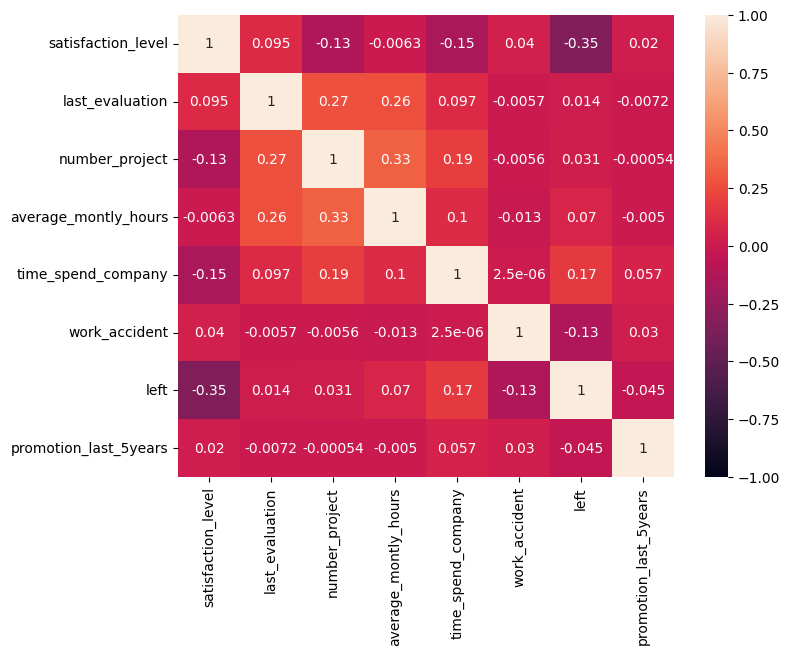

In [70]:
sns.heatmap(df.corr(numeric_only=True), vmin=-1,vmax=1, annot=True);

It seems that there is no multicollinearity.

## 3. Cluster Analysis

In [71]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, RobustScaler
from sklearn.metrics import silhouette_score

In [72]:
df

satisfaction_level  last_evaluation  number_project  \
0                   0.380            0.530               2   
1                   0.800            0.860               5   
2                   0.110            0.880               7   
3                   0.720            0.870               5   
4                   0.370            0.520               2   
...                   ...              ...             ...   
11986               0.900            0.550               3   
11987               0.740            0.950               5   
11988               0.850            0.540               3   
11989               0.330            0.650               3   
11990               0.500            0.730               4   

       average_montly_hours  time_spend_company  work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272                   4              0     1   
3                       223                   5              0     1   
4                       159                   3              0     1   
...                     ...                 ...            ...   ...   
11986                   259                  10              1     0   
11987                   266                  10              0     0   
11988                   185                  10              0     0   
11989                   172                  10              0     0   
11990                   180                   3              0     0   

       promotion_last_5years departments  salary  
0                          0       sales     low  
1                          0       sales  medium  
2                          0       sales  medium  
3                          0       sales     low  
4                          0       sales     low  
...                      ...         ...     ...  
11986                      1  management    high  
11987                      1  management    high  
11988                      1  management    high  
11989                      1   marketing    high  
11990                      0          IT     low  

[11991 rows x 10 columns]

**The cardinality of the 'departments' feature is high and the overall quit rates in departments are close to each other, so I will not use it in the Clustering algorithm.**

In [73]:
X = df[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'work_accident',
       'promotion_last_5years', 'salary']]
X

satisfaction_level  last_evaluation  number_project  \
0                   0.380            0.530               2   
1                   0.800            0.860               5   
2                   0.110            0.880               7   
3                   0.720            0.870               5   
4                   0.370            0.520               2   
...                   ...              ...             ...   
11986               0.900            0.550               3   
11987               0.740            0.950               5   
11988               0.850            0.540               3   
11989               0.330            0.650               3   
11990               0.500            0.730               4   

       average_montly_hours  time_spend_company  work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
11986                   259                  10              1   
11987                   266                  10              0   
11988                   185                  10              0   
11989                   172                  10              0   
11990                   180                   3              0   

       promotion_last_5years  salary  
0                          0     low  
1                          0  medium  
2                          0  medium  
3                          0     low  
4                          0     low  
...                      ...     ...  
11986                      1    high  
11987                      1    high  
11988                      1    high  
11989                      1    high  
11990                      0     low  

[11991 rows x 8 columns]

In [74]:
# X = pd.concat([X,  pd.get_dummies(X, columns=['salary'], dtype=int,drop_first=True)], axis=1)
# X = X.drop(['salary'], axis=1)

In [75]:
# encoder = OrdinalEncoder()

# # Fit and transform the specified columns
# X['salary'] = encoder.fit_transform(X[['salary']])

In [76]:
ord_map = {'low':0,'medium':1, 'high':2}
X['salary'] = X['salary'].map(ord_map)

In [77]:
X

satisfaction_level  last_evaluation  number_project  \
0                   0.380            0.530               2   
1                   0.800            0.860               5   
2                   0.110            0.880               7   
3                   0.720            0.870               5   
4                   0.370            0.520               2   
...                   ...              ...             ...   
11986               0.900            0.550               3   
11987               0.740            0.950               5   
11988               0.850            0.540               3   
11989               0.330            0.650               3   
11990               0.500            0.730               4   

       average_montly_hours  time_spend_company  work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
11986                   259                  10              1   
11987                   266                  10              0   
11988                   185                  10              0   
11989                   172                  10              0   
11990                   180                   3              0   

       promotion_last_5years  salary  
0                          0       0  
1                          0       1  
2                          0       1  
3                          0       0  
4                          0       0  
...                      ...     ...  
11986                      1       2  
11987                      1       2  
11988                      1       2  
11989                      1       2  
11990                      0       0  

[11991 rows x 8 columns]

<h3>ii. Determine optimal number of clusters</h3>

In [78]:
# function to compute hopkins's statistic for the dataframe X
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
def hopkins(X, ratio=0.05):

    if not isinstance(X, np.ndarray):
      X = X.values  #convert dataframe to a numpy array
    sample_size = int(X.shape[0] * ratio) #0.05 (5%) based on paper by Lawson and Jures

    #a uniform random sample in the original data space
    X_uniform_random_sample = uniform(X.min(axis=0), X.max(axis=0) ,(sample_size , X.shape[1]))

    #a random sample of size sample_size from the original data X
    random_indices=sample(range(0, X.shape[0], 1), sample_size)
    X_sample = X[random_indices]

    #initialise unsupervised learner for implementing neighbor searches
    neigh = NearestNeighbors(n_neighbors=2)
    nbrs=neigh.fit(X)

    #u_distances = nearest neighbour distances from uniform random sample
    u_distances , u_indices = nbrs.kneighbors(X_uniform_random_sample , n_neighbors=2)
    u_distances = u_distances[: , 0] #distance to the first (nearest) neighbour

    #w_distances = nearest neighbour distances from a sample of points from original data X
    w_distances , w_indices = nbrs.kneighbors(X_sample , n_neighbors=2)
    #distance to the second nearest neighbour (as the first neighbour will be the point itself, with distance = 0)
    w_distances = w_distances[: , 1]

    u_sum = np.sum(u_distances)
    w_sum = np.sum(w_distances)

    #compute and return hopkins' statistic
    H = u_sum/ (u_sum + w_sum)
    return H

In [79]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11991 entries, 0 to 11990
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     11991 non-null  float64
 1   last_evaluation        11991 non-null  float64
 2   number_project         11991 non-null  int64  
 3   average_montly_hours   11991 non-null  int64  
 4   time_spend_company     11991 non-null  int64  
 5   work_accident          11991 non-null  int64  
 6   promotion_last_5years  11991 non-null  int64  
 7   salary                 11991 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 749.6 KB


In [80]:
hopkins(X, 0.5)

0.7618745417635712

In [81]:
result=[]
for _ in range(10):
    result.append(hopkins(X, 1))
np.mean(result)

0.7619811222038193

In [82]:
result = []
for _ in range(10):
    result.append(hopkins(MinMaxScaler().fit_transform(X), 1))
np.mean(result)

0.8630550945285776

In [83]:
result = []
for _ in range(10):
    result.append(hopkins(StandardScaler().fit_transform(X), 1))
np.mean(result)

0.8832069619219054

In [84]:
X_scaled = StandardScaler().fit_transform(X)

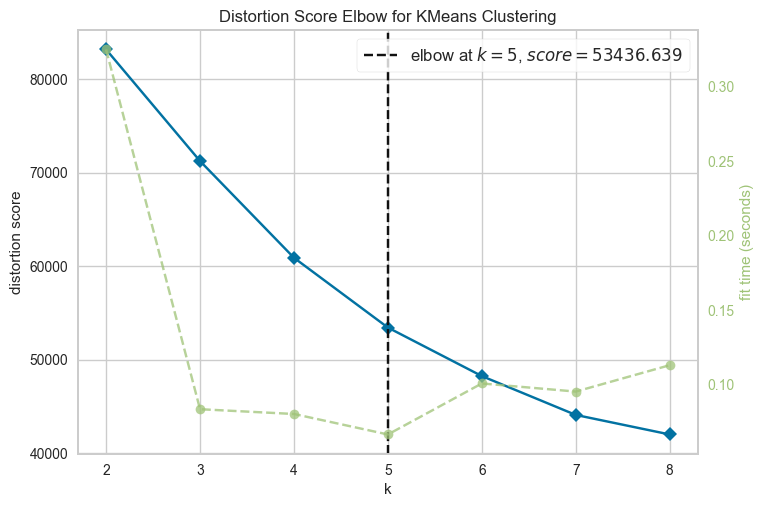

In [85]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show();

In [86]:
K=range(2,10)
distortion=[]
for k in K:
    kmeanModel = KMeans(n_clusters=k,
                        random_state=42)
    kmeanModel.fit(X_scaled)

    distances = kmeanModel.transform(X_scaled) 
    labels_ = kmeanModel.labels_ 

    result = []
    for i in range(k):
        cluster_distances = distances[labels_== i, i] 
        result.append(np.mean(cluster_distances**2))
    distortion.append(sum(result))

Text(0.5, 1.0, 'Elbow Method')

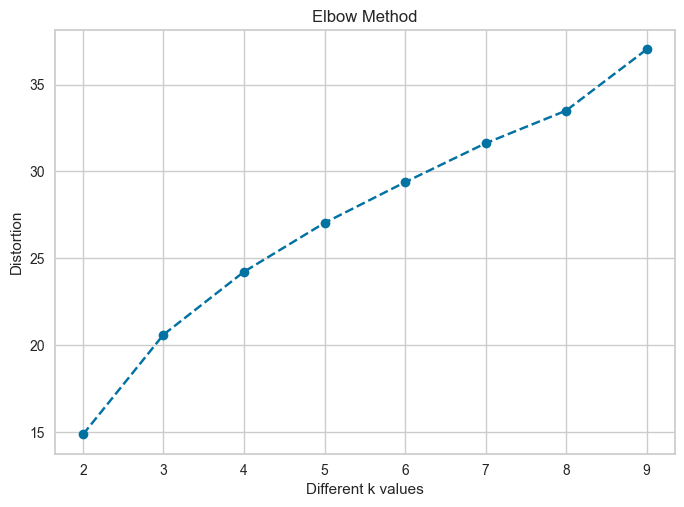

In [87]:
plt.plot(K, distortion, "bo--")
plt.xlabel("Different k values")
plt.ylabel("Distortion") 
plt.title("Elbow Method")

In [88]:
K_means_model = KMeans(n_clusters=5, 
                       random_state=42)

In [89]:
K_means_model.fit(X_scaled)

KMeans(n_clusters=5, random_state=42)

In [90]:
silhouette_score(X_scaled, K_means_model.labels_)

0.19578039083011103

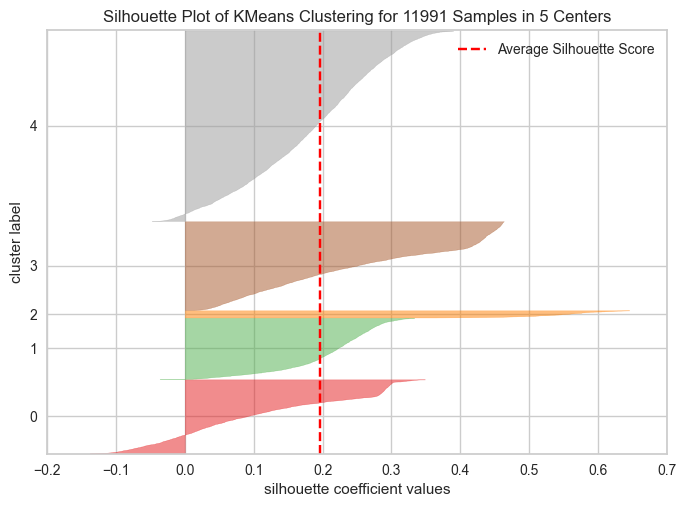

In [91]:
from yellowbrick.cluster import SilhouetteVisualizer         
visualizer = SilhouetteVisualizer(K_means_model)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

In [92]:
pd.crosstab(K_means_model.labels_,df.left)

left      0    1
row_0           
0      1124  983
1      1661   80
2       195    8
3      1704  819
4      5316  101

In [93]:
pd.crosstab(K_means_model.labels_,[df.promotion_last_5years,df.left])

promotion_last_5years     0         1   
left                      0    1    0  1
row_0                                   
0                      1124  983    0  0
1                      1661   80    0  0
2                         0    0  195  8
3                      1704  819    0  0
4                      5316  101    0  0

In [94]:
pd.crosstab(K_means_model.labels_,[df.work_accident,df.left])

work_accident     0          1    
left              0    1     0   1
row_0                             
0              1088  960    36  23
1                 0    0  1661  80
2               149    6    46   2
3              1702  819     2   0
4              5316  101     0   0

In [95]:
pd.crosstab(K_means_model.labels_,[df.number_project,df.left])

number_project    2          3         4          5         6         7
left              0    1     0   1     0    1     0    1    0    1    1
row_0                                                                  
0                14    2   162   5   301  158   377  311  270  363  144
1               123   44   602   1   550   17   320   16   66    2    0
2                14    5    62   0    74    2    33    0   12    1    0
3               367  793   798  13   402   10   103    3   34    0    0
4               207   13  1858  19  2121   50  1057   13   73    5    1

In [96]:
pd.crosstab(K_means_model.labels_,[df.time_spend_company,df.left])

time_spend_company    2         3         4         5         6        7   8   \
left                   0   1     0    1    0    1    0    1    0    1   0   0   
row_0                                                                           
0                     18   2   131   15  256  458  267  403  260  105  51  52   
1                    492   1   709   45  243    7  116   23   64    4   9  18   
2                     39   0    83    6   21    1   10    1   11    0  18   5   
3                    453   8   765  790  279   14  114    7   72    0  15   6   
4                   1877  20  2628   18  711   15   73   48   26    0   1   0   

time_spend_company  10  
left                 0  
row_0                   
0                   89  
1                   10  
2                    8  
3                    0  
4                    0

In [97]:
pd.crosstab(K_means_model.labels_,[df.salary,df.left])

salary high       low      medium     
left      0   1     0    1      0    1
row_0                                 
0       123  21   483  589    518  373
1       140   0   809   39    712   41
2        44   0    33    5    118    3
3       130  23   874  490    700  306
4       505   4  2367   51   2444   46

In [98]:
pd.crosstab(K_means_model.labels_,[df.departments,df.salary]).T

row_0                 0    1   2    3    4
departments salary                        
IT          high     11    4   0   11   45
            low      80   74   1  110  211
            medium   70   59   1   86  213
RandD       high      6    8   1    9   23
            low      60   57   3   72  130
            medium   59   44  17   46  159
accounting  high      6   13   5    5   34
            low      59   37   1   68  131
            medium   49   35   4   62  112
hr          high      4    3   2    3   26
            low      45   42   2   66  141
            medium   42   31   7   62  125
management  high     33   11  23    8   53
            low      25   20   3   26   65
            medium   35   25  10   22   77
marketing   high      8    7   3   13   31
            low      65   45   6   79  115
            medium   45   47  18   52  139
product_mng high      7   10   0   13   22
            low      69   55   0   76  143
            medium   45   42   0   73  131
sales       high     36   28   9   40  124
            low     290  220   9  393  641
            medium  258  216  40  276  659
support     high     18   30   0   19   59
            low     157  135   6  214  355
            medium  128  116  10  136  438
technical   high     15   26   1   32   92
            low     222  163   7  260  486
            medium  160  138  14  191  437

In [99]:
K_means_model = KMeans(n_clusters=4, 
                       random_state=42)

In [100]:
K_means_model.fit(X_scaled)

KMeans(n_clusters=4, random_state=42)

In [101]:
silhouette_score(X_scaled, K_means_model.labels_)

0.22257864029071234

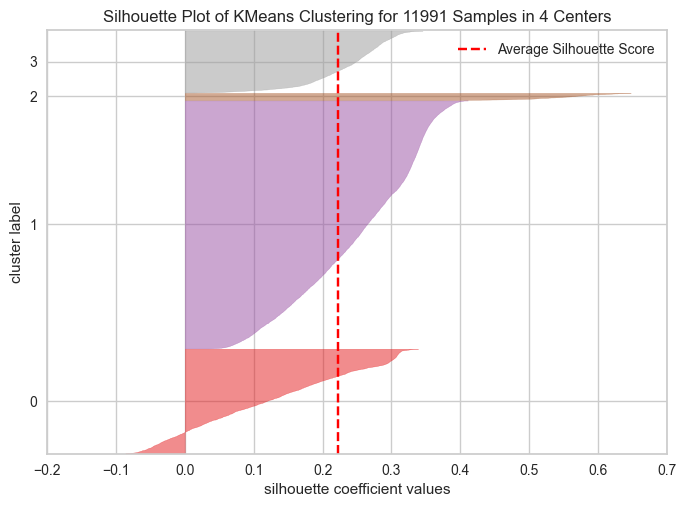

In [102]:
from yellowbrick.cluster import SilhouetteVisualizer         
visualizer = SilhouetteVisualizer(K_means_model)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

In [103]:
pd.crosstab(K_means_model.labels_,df.left)

left      0     1
row_0            
0      1937  1039
1      6189   862
2       195     8
3      1679    82

In [104]:
pd.crosstab(K_means_model.labels_,[df.salary,df.left])

salary high       low      medium     
left      0   1     0    1      0    1
row_0                                 
0       213  23   818  616    906  400
1       542  25  2900  513   2747  324
2        44   0    33    5    118    3
3       143   0   815   40    721   42

In [105]:
K_means_model = KMeans(n_clusters=2, 
                       random_state=42)

In [106]:
K_means_model.fit(X_scaled)

KMeans(n_clusters=2, random_state=42)

In [107]:
pd.crosstab(K_means_model.labels_,df.left)

left      0     1
row_0            
0      7868   921
1      2132  1070

## 4. Predictive Model Building

### Preprocessing

In [108]:
X['departments'] = df.departments
X

satisfaction_level  last_evaluation  number_project  \
0                   0.380            0.530               2   
1                   0.800            0.860               5   
2                   0.110            0.880               7   
3                   0.720            0.870               5   
4                   0.370            0.520               2   
...                   ...              ...             ...   
11986               0.900            0.550               3   
11987               0.740            0.950               5   
11988               0.850            0.540               3   
11989               0.330            0.650               3   
11990               0.500            0.730               4   

       average_montly_hours  time_spend_company  work_accident  \
0                       157                   3              0   
1                       262                   6              0   
2                       272                   4              0   
3                       223                   5              0   
4                       159                   3              0   
...                     ...                 ...            ...   
11986                   259                  10              1   
11987                   266                  10              0   
11988                   185                  10              0   
11989                   172                  10              0   
11990                   180                   3              0   

       promotion_last_5years  salary departments  
0                          0       0       sales  
1                          0       1       sales  
2                          0       1       sales  
3                          0       0       sales  
4                          0       0       sales  
...                      ...     ...         ...  
11986                      1       2  management  
11987                      1       2  management  
11988                      1       2  management  
11989                      1       2   marketing  
11990                      0       0          IT  

[11991 rows x 9 columns]

In [109]:
y = df['left']
y.sample(3)

7911    0
8129    0
7356    0
Name: left, dtype: int64

In [110]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 42)

In [111]:
X_train.shape,y_train.shape

((9592, 9), (9592,))

In [112]:
X_test.shape,y_test.shape

((2399, 9), (2399,))

In [113]:
onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)
column_trans = make_column_transformer((onehot, ['departments']),
                                        remainder='passthrough', 
                                        verbose_feature_names_out=False).set_output(transform="pandas") 

In [114]:
column_trans.fit_transform(X_train)

departments_IT  departments_RandD  departments_accounting  \
2032            0.000              0.000                   0.000   
10435           1.000              0.000                   0.000   
2021            0.000              0.000                   0.000   
11597           0.000              0.000                   0.000   
1999            0.000              0.000                   0.000   
...               ...                ...                     ...   
3933            0.000              0.000                   0.000   
7457            1.000              0.000                   0.000   
10327           0.000              0.000                   0.000   
9057            0.000              0.000                   0.000   
461             0.000              0.000                   0.000   

       departments_hr  departments_management  departments_marketing  \
2032            0.000                   0.000                  0.000   
10435           0.000                   0.000                  0.000   
2021            0.000                   0.000                  0.000   
11597           0.000                   1.000                  0.000   
1999            0.000                   0.000                  0.000   
...               ...                     ...                    ...   
3933            0.000                   0.000                  0.000   
7457            0.000                   0.000                  0.000   
10327           1.000                   0.000                  0.000   
9057            0.000                   1.000                  0.000   
461             0.000                   0.000                  0.000   

       departments_product_mng  departments_sales  departments_support  \
2032                     0.000              0.000                0.000   
10435                    0.000              0.000                0.000   
2021                     0.000              0.000                1.000   
11597                    0.000              0.000                0.000   
1999                     0.000              1.000                0.000   
...                        ...                ...                  ...   
3933                     0.000              0.000                1.000   
7457                     0.000              0.000                0.000   
10327                    0.000              0.000                0.000   
9057                     0.000              0.000                0.000   
461                      0.000              0.000                0.000   

       departments_technical  satisfaction_level  last_evaluation  \
2032                   1.000               0.980            0.910   
10435                  0.000               0.630            0.890   
2021                   0.000               0.850            0.590   
11597                  0.000               0.560            0.390   
1999                   0.000               0.500            0.750   
...                      ...                 ...              ...   
3933                   0.000               0.890            0.900   
7457                   0.000               0.570            0.420   
10327                  0.000               0.850            0.690   
9057                   0.000               0.660            0.620   
461                    1.000               0.800            0.530   

       number_project  average_montly_hours  time_spend_company  \
2032                4                   240                   3   
10435               3                   239                   3   
2021                3                   235                   3   
11597               3                   106                   8   
1999                6                   127                   3   
...               ...                   ...                 ...   
3933                4                   153                   3   
7457                2                   248                   4   
1032

### Classification Algorithms
 - Try at least 4 ML/DL algorithms.

In [ ]:
#!pip install lightgbm

In [115]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Gradient Boosting (XGBoost)
from xgboost import XGBClassifier

# Gradient Boosting (LightGBM)
from lightgbm import LGBMClassifier

# Support Vector Machines (SVM)
from sklearn.svm import SVC

# Neural Networks (using TensorFlow and Keras)
import tensorflow as tf
from tensorflow import keras
#from sklearn.neural_network import MLPClassifier

# K-Nearest Neighbors (KNN)
from sklearn.neighbors import KNeighborsClassifier

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

In [116]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score

In [117]:
##Instead of MLP I use below Deep Learning model

#### 1- Logistic Regression

In [118]:
# Model Building

In [119]:
operations = [("OneHot_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("log_reg", LogisticRegression(class_weight="balanced",random_state=42))]

lg = Pipeline(steps=operations)
lg.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [120]:
# Compare model performances according to metrics

In [121]:
eval_metric(lg, X_train, y_train, X_test, y_test)

Test_Set
[[1540  461]
 [  63  335]]
              precision    recall  f1-score   support

           0       0.96      0.77      0.85      2001
           1       0.42      0.84      0.56       398

    accuracy                           0.78      2399
   macro avg       0.69      0.81      0.71      2399
weighted avg       0.87      0.78      0.81      2399


Train_Set
[[6079 1920]
 [ 279 1314]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      7999
           1       0.41      0.82      0.54      1593

    accuracy                           0.77      9592
   macro avg       0.68      0.79      0.70      9592
weighted avg       0.86      0.77      0.80      9592



In [122]:
#  Prediction

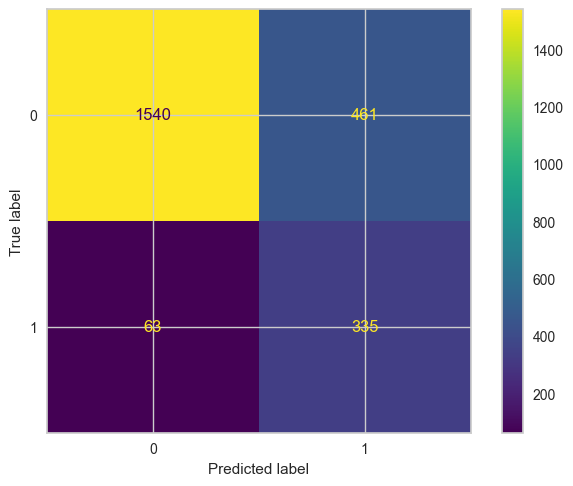

In [123]:
ConfusionMatrixDisplay.from_estimator(lg,X_test, y_test);

In [124]:
#grid search for Logistic Regression

In [125]:
scoring_metrics = ['accuracy', 'precision','recall', 'f1', 'roc_auc']

In [127]:
operations = [("OneHot_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("log_reg", LogisticRegression(random_state=42))]

lg_model = Pipeline(steps=operations)

# Define parameter grid for grid search
param_grid = {
    'log_reg__penalty': ['l1', 'l2'],
    'log_reg__C': [0.01, 0.1, 0.5, 0.7, 1.0, 10.0],
    'log_reg__class_weight': [None, 'balanced'],
    'log_reg__solver': ['liblinear', 'saga'],  # Additional solvers
    'log_reg__max_iter': [100, 200, 300]  # Maximum number of iterations
    #'log_reg__fit_intercept': [True, False],  # Whether to calculate the intercept
}

# Define scoring metrics for grid search
scoring_metrics = ['accuracy', 'precision','recall', 'f1', 'roc_auc']

# Create GridSearchCV object
grid_search = GridSearchCV(
    estimator=lg_model,
    param_grid=param_grid,
    scoring='recall',#=scoring_metrics
    cv=5,
    refit='roc_auc',  # Refit based on ROC-AUC score
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Print best parameters
print("Best Parameters:", best_params)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best Parameters: {'log_reg__C': 0.01, 'log_reg__class_weight': 'balanced', 'log_reg__max_iter': 100, 'log_reg__penalty': 'l1', 'log_reg__solver': 'liblinear'}


In [128]:
operations = [("OneHot_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("log_reg", LogisticRegression(class_weight="balanced",C=0.01,penalty='l1',solver='liblinear',max_iter=100,
                                             random_state=42))]

lg = Pipeline(steps=operations)
lg.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [129]:
eval_metric(lg, X_train, y_train, X_test, y_test)

Test_Set
[[1522  479]
 [  59  339]]
              precision    recall  f1-score   support

           0       0.96      0.76      0.85      2001
           1       0.41      0.85      0.56       398

    accuracy                           0.78      2399
   macro avg       0.69      0.81      0.70      2399
weighted avg       0.87      0.78      0.80      2399


Train_Set
[[6001 1998]
 [ 271 1322]]
              precision    recall  f1-score   support

           0       0.96      0.75      0.84      7999
           1       0.40      0.83      0.54      1593

    accuracy                           0.76      9592
   macro avg       0.68      0.79      0.69      9592
weighted avg       0.86      0.76      0.79      9592



##### Cross Validation

In [130]:
operations = [("OneHot_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("log_reg", LogisticRegression(class_weight="balanced",C=0.01,penalty='l1',solver='liblinear',max_iter=100,
                                             random_state=42))]

lg = Pipeline(steps=operations)

scores = cross_validate(lg,
                        X_train,
                        y_train,
                        scoring=scoring_metrics,
                        cv = 5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy     0.758
train_accuracy    0.761
test_precision    0.392
train_precision   0.396
test_recall       0.828
train_recall      0.832
test_f1           0.532
train_f1          0.536
test_roc_auc      0.831
train_roc_auc     0.833
dtype: float64

In [131]:
operations = [("OneHot_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("log_reg", LogisticRegression(class_weight="balanced",C=0.01,penalty='l1',solver='liblinear',max_iter=100,
                                             random_state=42))]

lg = Pipeline(steps=operations)
lg.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('log_reg',
                 LogisticRegression(C=0.01, class_weight='balanced',
                                    penalty='l1', random_state=42,
                                    solver='liblinear'))])

In [132]:
y_pred = lg.predict(X_test)
log_reg_f1 = f1_score(y_test, y_pred)
log_reg_acc = accuracy_score(y_test, y_pred)
log_reg_prec = precision_score(y_test, y_pred)
log_reg_recall = recall_score(y_test, y_pred)
log_reg_auc = roc_auc_score(y_test, y_pred)

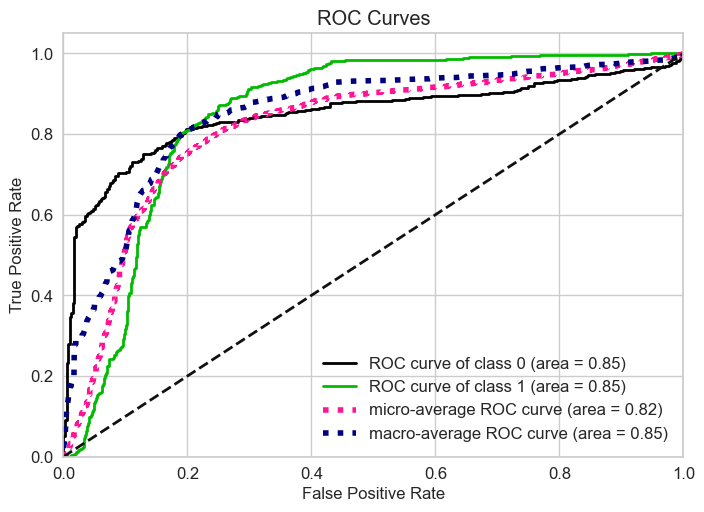

In [133]:
y_pred_proba = lg.predict_proba(X_test)
plot_roc(y_test, y_pred_proba)
plt.show();

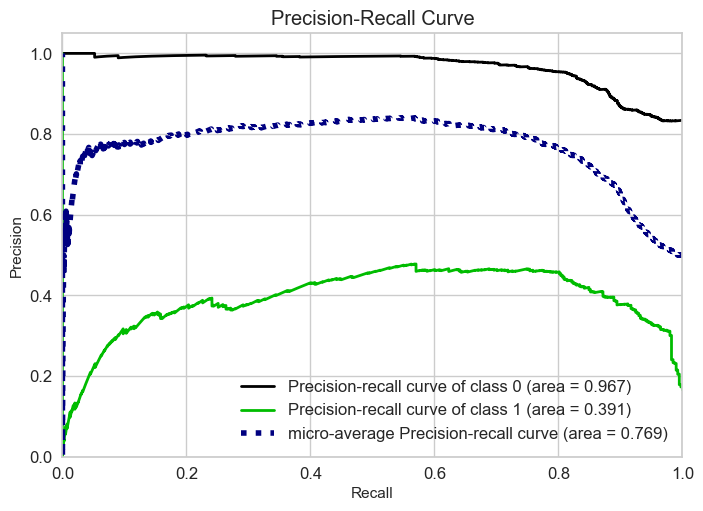

In [134]:
plot_precision_recall(y_test, y_pred_proba)
plt.show();

##### Feature Importance

In [135]:
lg_model = lg.named_steps['log_reg']

# Get feature importances (coefficients in this case)
feature_importances = np.ravel(lg_model.coef_)
one_hot_encoded_feature_names = lg.named_steps['OneHot_Encoder'].get_feature_names_out(X_train.columns)

# Create a DataFrame to store the feature names and their corresponding importances
feature_importance_df = pd.DataFrame({'Feature': one_hot_encoded_feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

feature_importance_df

Feature  Importance
14       time_spend_company       0.724
13     average_montly_hours       0.104
11          last_evaluation       0.091
0            departments_IT       0.000
7         departments_sales       0.000
8       departments_support       0.000
9     departments_technical       0.000
6   departments_product_mng       0.000
5     departments_marketing       0.000
3            departments_hr       0.000
2    departments_accounting       0.000
4    departments_management      -0.021
1         departments_RandD      -0.037
16    promotion_last_5years      -0.062
12           number_project      -0.301
17                   salary      -0.308
15            work_accident      -0.369
10       satisfaction_level      -0.898

#### 2- Random Forest

In [136]:
ord_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
column_trans = make_column_transformer((ord_encoder , ['departments']),
                                        remainder='passthrough', 
                                        verbose_feature_names_out=False).set_output(transform="pandas") 


In [180]:
operations = [("Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("rand_forest", RandomForestClassifier(random_state=42))]

rf = Pipeline(steps=operations)
rf.fit(X_train, y_train)

Pipeline(steps=[('Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('rand_forest', RandomForestClassifier(random_state=42))])

In [181]:
eval_metric(rf, X_train, y_train, X_test, y_test)

Test_Set
[[1997    4]
 [  30  368]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.99      0.92      0.96       398

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399


Train_Set
[[7999    0]
 [   0 1593]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      1.00      1.00      1593

    accuracy                           1.00      9592
   macro avg       1.00      1.00      1.00      9592
weighted avg       1.00      1.00      1.00      9592



In [ ]:
# grid search for Random Forest

In [139]:
operations = [("Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("rand_forest", RandomForestClassifier(random_state=42))]

rf = Pipeline(steps=operations)


param_grid = {
    'rand_forest__n_estimators': [100, 200, 300],
    'rand_forest__max_depth': [None, 5, 10, 20],
    'rand_forest__min_samples_split': [2, 5, 10],
    'rand_forest__min_samples_leaf': [1, 2, 4],
    #'rand_forest__bootstrap': [True, False]
}
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring='recall', 
    cv=5,
    verbose=1
)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'rand_forest__max_depth': 10, 'rand_forest__min_samples_leaf': 1, 'rand_forest__min_samples_split': 2, 'rand_forest__n_estimators': 200}
Best Model: Pipeline(steps=[('Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('rand_forest',
                 RandomForestClassifier(max_depth=10, n_estimators=200,
                                        random_state=42))])


In [ ]:
# Cross Validation

In [140]:
operations = [("Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("rand_forest", RandomForestClassifier(max_depth=10,min_samples_split=2,n_estimators=200,random_state=42))]

rf = Pipeline(steps=operations)
scores = cross_validate(rf,
                        X_train,
                        y_train,
                        scoring=scoring_metrics,
                        cv = 5,
                        return_train_score=True)
rf_scores = pd.DataFrame(scores)
rf_scores.mean()[2:]

test_accuracy     0.984
train_accuracy    0.988
test_precision    0.986
train_precision   0.991
test_recall       0.916
train_recall      0.935
test_f1           0.950
train_f1          0.962
test_roc_auc      0.983
train_roc_auc     1.000
dtype: float64

In [ ]:
# Final model

In [141]:
operations = [("Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("rand_forest", RandomForestClassifier(max_depth=10,min_samples_split=2,n_estimators=200,random_state=42))]

rf = Pipeline(steps=operations)
rf.fit(X_train, y_train)

Pipeline(steps=[('Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('rand_forest',
                 RandomForestClassifier(max_depth=10, n_estimators=200,
                                        random_state=42))])

In [142]:
y_pred = rf.predict(X_test)
random_forest_f1 = f1_score(y_test, y_pred)
random_forest_acc = accuracy_score(y_test, y_pred)
random_forest_prec = precision_score(y_test, y_pred)
random_forest_recall = recall_score(y_test, y_pred)
random_forest_auc = roc_auc_score(y_test, y_pred)

In [143]:
eval_metric(rf, X_train, y_train, X_test, y_test)

Test_Set
[[1997    4]
 [  30  368]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.99      0.92      0.96       398

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399


Train_Set
[[7986   13]
 [ 106 1487]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7999
           1       0.99      0.93      0.96      1593

    accuracy                           0.99      9592
   macro avg       0.99      0.97      0.98      9592
weighted avg       0.99      0.99      0.99      9592



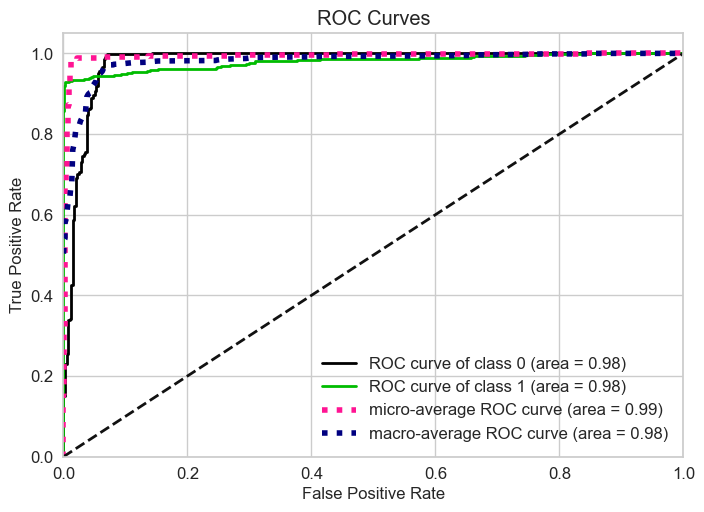

In [144]:
y_pred_proba = rf.predict_proba(X_test)
plot_roc(y_test, y_pred_proba)
plt.show();

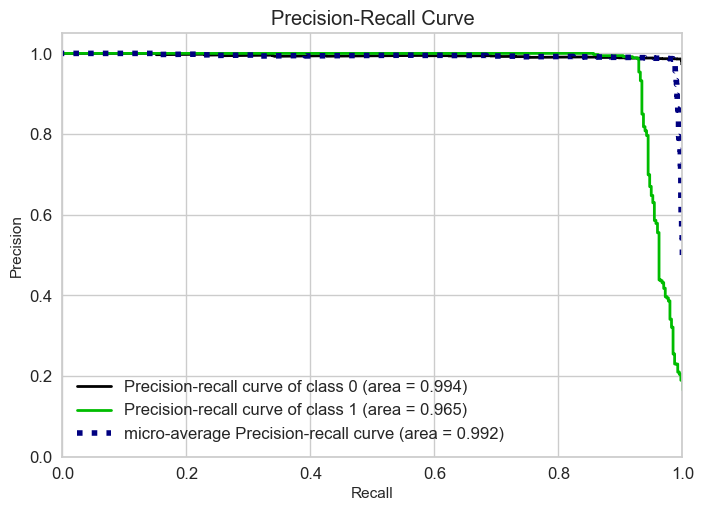

In [145]:
plot_precision_recall(y_test, y_pred_proba)
plt.show();

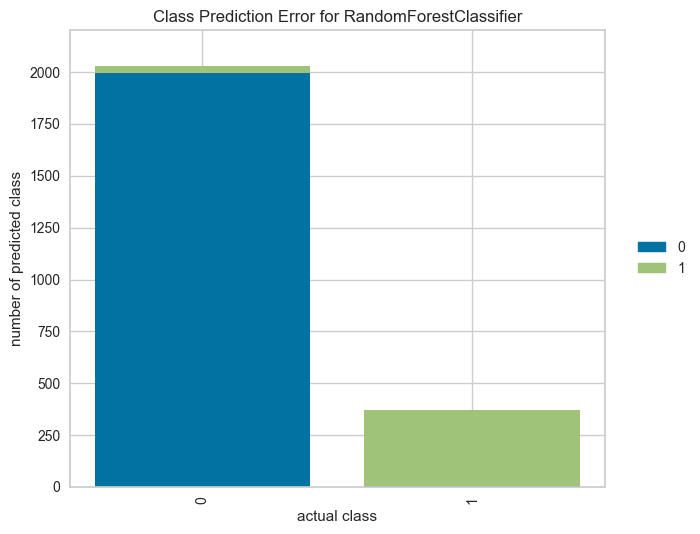

In [146]:
## It is good for multiclass
from yellowbrick.classifier import ClassPredictionError

visualizer = ClassPredictionError(rf)

# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)

# Evaluate the model on the test data
visualizer.score(X_test, y_test)

# Draw visualization
visualizer.show();

**Feature Importance**

In [147]:
rf_model = rf.named_steps["rand_forest"]

# Get feature importances
rf_features = rf_model.feature_importances_

# Print or use the feature importances
print(rf_features)

[0.00599889 0.36501972 0.11663337 0.19076764 0.14173959 0.16920928
 0.00450829 0.00046567 0.00565754]


In [148]:
column_trans

ColumnTransformer(remainder='passthrough',
                  transformers=[('ordinalencoder',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=-1),
                                 ['departments'])],
                  verbose_feature_names_out=False)

In [149]:
rf_model = rf.named_steps['rand_forest']

# Extracting the one-hot encoded feature names
one_hot_encoded_feature_names = rf.named_steps['Ordinal_Encoder'].get_feature_names_out(X_train.columns)

# Get feature importances
rf_features = pd.DataFrame(index=one_hot_encoded_feature_names, data=rf_model.feature_importances_, columns=['Importance']).sort_values("Importance", ascending=False)

# Print or use the feature importances
print(rf_features)

                       Importance
satisfaction_level          0.365
number_project              0.191
time_spend_company          0.169
average_montly_hours        0.142
last_evaluation             0.117
departments                 0.006
salary                      0.006
work_accident               0.005
promotion_last_5years       0.000


In [150]:
rf_features

Importance
satisfaction_level          0.365
number_project              0.191
time_spend_company          0.169
average_montly_hours        0.142
last_evaluation             0.117
departments                 0.006
salary                      0.006
work_accident               0.005
promotion_last_5years       0.000

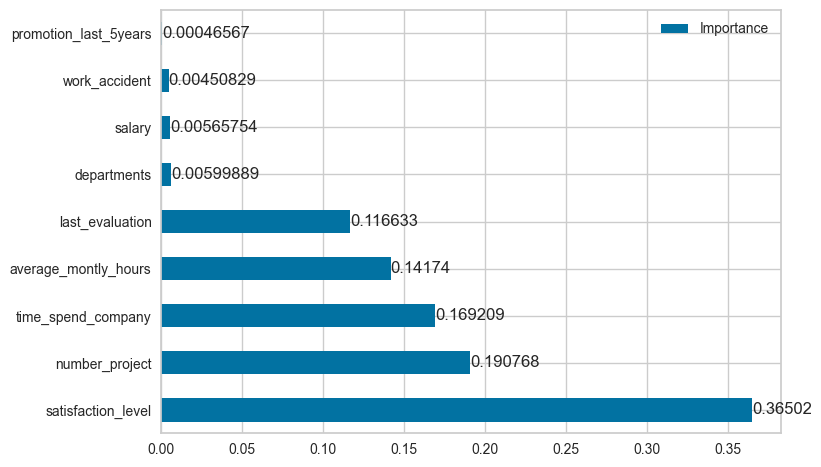

In [151]:
ax = rf_features.sort_values(by='Importance',ascending=False).plot.barh()
ax.bar_label(ax.containers[0]);

##### Model with 5 Features:
+ satisfaction_level
+ number_project               
+ time_spend_company            
+ average_montly_hours          
+ last_evaluation             

In [152]:
X5 = X[['satisfaction_level','number_project','time_spend_company','average_montly_hours','last_evaluation']]

In [153]:
X5_train, X5_test, y_train, y_test = train_test_split(X5, y, stratify = y, test_size = 0.20, random_state = 42)

In [154]:
operations = [("scaler", StandardScaler()), 
              ("rand_forest", RandomForestClassifier(max_depth=10,min_samples_split=2,n_estimators=200,random_state=42))]

rf = Pipeline(steps=operations)
rf.fit(X5_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rand_forest',
                 RandomForestClassifier(max_depth=10, n_estimators=200,
                                        random_state=42))])

In [155]:
y_pred5 = rf.predict(X5_test)
random_forest5_f1 = f1_score(y_test, y_pred5)
random_forest5_acc = accuracy_score(y_test, y_pred5)
random_forest5_prec = precision_score(y_test, y_pred5)
random_forest5_recall = recall_score(y_test, y_pred5)
random_forest5_auc = roc_auc_score(y_test, y_pred5)

In [156]:
eval_metric(rf, X5_train, y_train, X5_test, y_test)

Test_Set
[[1996    5]
 [  29  369]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.99      0.93      0.96       398

    accuracy                           0.99      2399
   macro avg       0.99      0.96      0.97      2399
weighted avg       0.99      0.99      0.99      2399


Train_Set
[[7987   12]
 [ 103 1490]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7999
           1       0.99      0.94      0.96      1593

    accuracy                           0.99      9592
   macro avg       0.99      0.97      0.98      9592
weighted avg       0.99      0.99      0.99      9592



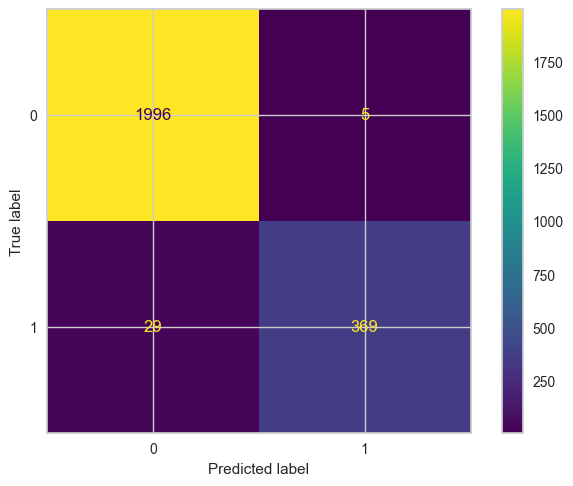

In [157]:
ConfusionMatrixDisplay.from_estimator(rf,X5_test, y_test);

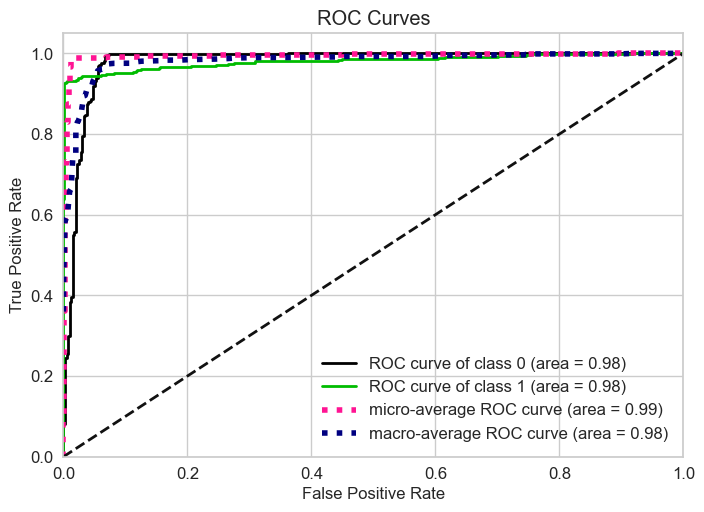

In [158]:
y_pred_proba = rf.predict_proba(X5_test)
plot_roc(y_test, y_pred_proba)
plt.show();

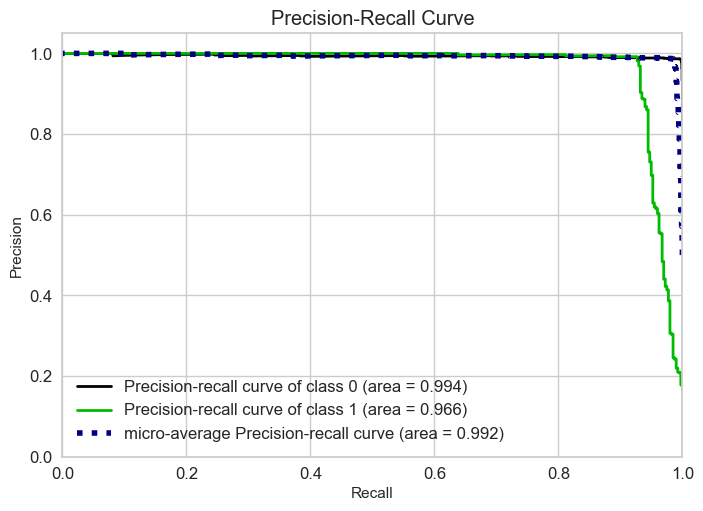

In [159]:
y_pred_proba = rf.predict_proba(X5_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

#### 3- Gradient Boosting ( XGBoost, LightGBM)

##### XGBOOST

In [160]:
ord_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
column_trans = make_column_transformer((ord_encoder , ['departments']),
                                        remainder='passthrough', 
                                        verbose_feature_names_out=False).set_output(transform="pandas") 

In [161]:
operations = [("Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("Gradient_Boosting", XGBClassifier(random_state=42))]

gb = Pipeline(steps=operations)
gb.fit(X_train, y_train)

Pipeline(steps=[('Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('Gradient_Boosting',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byle...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [162]:
eval_metric(gb, X_train, y_train, X_test, y_test)

Test_Set
[[1987   14]
 [  29  369]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.96      0.93      0.94       398

    accuracy                           0.98      2399
   macro avg       0.97      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399


Train_Set
[[7993    6]
 [  30 1563]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7999
           1       1.00      0.98      0.99      1593

    accuracy                           1.00      9592
   macro avg       1.00      0.99      0.99      9592
weighted avg       1.00      1.00      1.00      9592



In [ ]:
# grid search for XGboost

In [163]:
operations = [("Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("Gradient_Boosting", XGBClassifier(random_state=42))]

gb = Pipeline(steps=operations)

# Define the hyperparameters to search
param_grid = {
    'Gradient_Boosting__n_estimators': [50, 100, 200],
    'Gradient_Boosting__learning_rate': [0.01, 0.1, 0.2, 0.5],
    'Gradient_Boosting__max_depth': [3, 5, 7]
}


grid_search = GridSearchCV(gb, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

Best Parameters: {'Gradient_Boosting__learning_rate': 0.2, 'Gradient_Boosting__max_depth': 3, 'Gradient_Boosting__n_estimators': 200}
Best Model: Pipeline(steps=[('Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('Gradient_Boosting',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byle...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                     

In [164]:
operations = [("Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("Gradient_Boosting", XGBClassifier(learning_rate=0.2, max_depth=3, n_estimators=200, random_state=42))]

gb = Pipeline(steps=operations)
scores = cross_validate(gb,
                        X_train,
                        y_train,
                        scoring=scoring_metrics,
                        cv = 5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy     0.982
train_accuracy    0.987
test_precision    0.965
train_precision   0.983
test_recall       0.923
train_recall      0.940
test_f1           0.944
train_f1          0.961
test_roc_auc      0.985
train_roc_auc     0.996
dtype: float64

In [ ]:
#final model

In [165]:
operations = [("Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("Gradient_Boosting", XGBClassifier(learning_rate=0.2, max_depth=3, n_estimators=200, random_state=42))]

gb = Pipeline(steps=operations)
gb.fit(X_train, y_train)

Pipeline(steps=[('Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('Gradient_Boosting',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_byle...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=0.2,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=3, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=200, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [166]:
y_pred = gb.predict(X_test)
XGB_f1 = f1_score(y_test, y_pred)
XGB_acc = accuracy_score(y_test, y_pred)
XGB_prec = precision_score(y_test, y_pred)
XGB_recall = recall_score(y_test, y_pred)
XGB_auc = roc_auc_score(y_test, y_pred)

In [167]:
eval_metric(gb, X_train, y_train, X_test, y_test)

Test_Set
[[1984   17]
 [  27  371]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.96      0.93      0.94       398

    accuracy                           0.98      2399
   macro avg       0.97      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399


Train_Set
[[7967   32]
 [ 102 1491]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7999
           1       0.98      0.94      0.96      1593

    accuracy                           0.99      9592
   macro avg       0.98      0.97      0.97      9592
weighted avg       0.99      0.99      0.99      9592



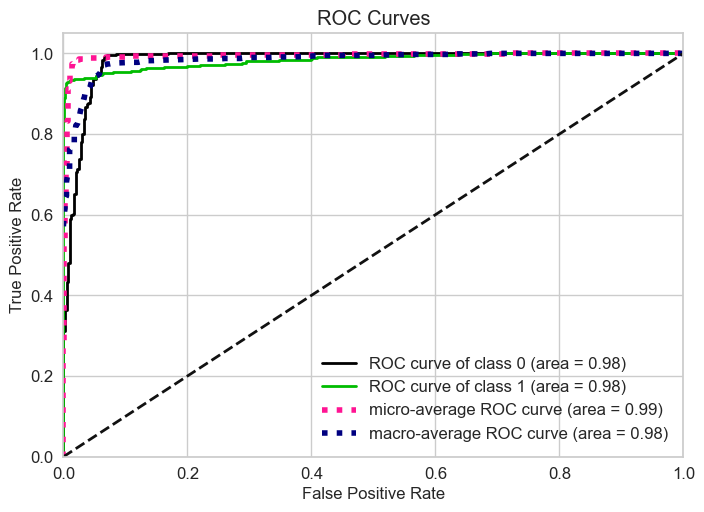

In [168]:
y_pred_proba = gb.predict_proba(X_test)
plot_roc(y_test, y_pred_proba)
plt.show();

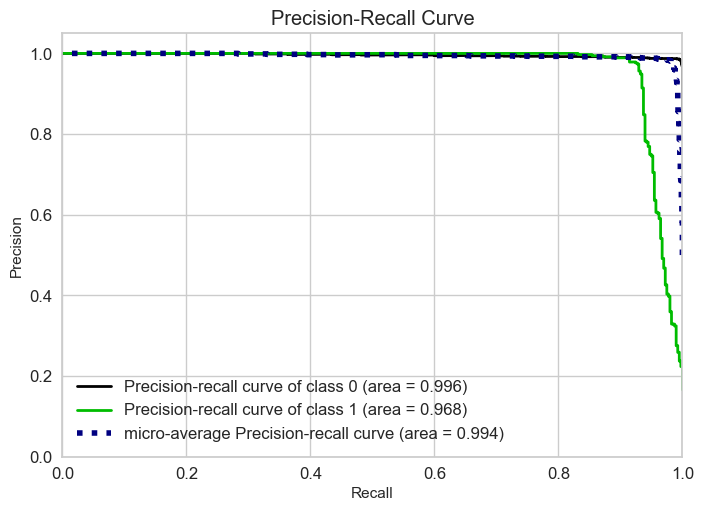

In [169]:
y_pred_proba = gb.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

**Feature Importance**

In [170]:
gb_model = gb.named_steps['Gradient_Boosting']

# Extracting the one-hot encoded feature names
one_hot_encoded_feature_names = gb.named_steps['Ordinal_Encoder'].get_feature_names_out(X_train.columns)

# Get feature importances
gb_features = pd.DataFrame(index=one_hot_encoded_feature_names, data=gb_model.feature_importances_, columns=['Importance']).sort_values("Importance", ascending=False)

# Print or use the feature importances
print(gb_features)


                       Importance
satisfaction_level          0.320
time_spend_company          0.268
number_project              0.169
last_evaluation             0.089
average_montly_hours        0.057
work_accident               0.043
salary                      0.034
departments                 0.012
promotion_last_5years       0.009


##### LGB

In [182]:
operations = [("Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("LGB", LGBMClassifier(random_state=42))]

lgb = Pipeline(steps=operations)
lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1593, number of negative: 7999
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000221 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 412
[LightGBM] [Info] Number of data points in the train set: 9592, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166076 -> initscore=-1.613698
[LightGBM] [Info] Start training from score -1.613698


Pipeline(steps=[('Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('LGB', LGBMClassifier(random_state=42))])

In [183]:
eval_metric(lgb, X_train, y_train, X_test, y_test)

Test_Set
[[1993    8]
 [  28  370]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2001
           1       0.98      0.93      0.95       398

    accuracy                           0.98      2399
   macro avg       0.98      0.96      0.97      2399
weighted avg       0.98      0.98      0.98      2399


Train_Set
[[7992    7]
 [  44 1549]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      7999
           1       1.00      0.97      0.98      1593

    accuracy                           0.99      9592
   macro avg       1.00      0.99      0.99      9592
weighted avg       0.99      0.99      0.99      9592



In [ ]:
#grid search

In [184]:
operations = [("Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("LGB", LGBMClassifier(random_state=42))]

lgb = Pipeline(steps=operations)

# Define the hyperparameters to search
param_grid = {
    'LGB__n_estimators': [50, 100, 200],
    'LGB__learning_rate': [0.01, 0.1, 0.2, 0.5],
    'LGB__max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(lgb, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

[LightGBM] [Info] Number of positive: 1274, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 7673, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166037 -> initscore=-1.613980
[LightGBM] [Info] Start training from score -1.613980
[LightGBM] [Info] Number of positive: 1274, number of negative: 6399
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000173 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 7673, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166037 -> initscore=-1.613980
[LightGBM] [

[LightGBM] [Info] Number of positive: 1274, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000154 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 7673, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166037 -> initscore=-1.613980
[LightGBM] [Info] Start training from score -1.613980
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1274, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 7673, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166037 -> initscore=-1.613980
[LightGBM] [Info] Start training from score -1.613980
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1274, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000157 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 7673, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166037 -> initscore=-1.613980
[LightGBM] [Info] Start training from score -1.613980
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1274, number of negative: 6400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000260 seconds.
You can set `force_col_wise=true` to remove the overhead.
[Lig

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1274, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 7673, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166037 -> initscore=-1.613980
[LightGBM] [Info] Start training from score -1.613980
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1275, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000165 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 7674, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166145 -> initscore=-1.613196
[LightGBM] [Info] Start training from score -1.613196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1274, number of negative: 6399
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000274 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 7673, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166037 -> initscore=-1.613980
[LightGBM] [Info] Start training from score -1.613980
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_lea

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1274, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000143 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 7673, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166037 -> initscore=-1.613980
[LightGBM] [Info] Start training from score -1.613980
[LightGBM] [Warning] Accuracy may be bad since you didn't

[LightGBM] [Info] Number of positive: 1274, number of negative: 6399
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000193 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 7673, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166037 -> initscore=-1.613980
[LightGBM] [Info] Start training from score -1.613980
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[LightGBM] [Info] Number of positive: 1274, number of negative: 6399
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000178 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 7673, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166037 -> initscore=-1.613980
[LightGBM] [Info] Start training from score -1.613980
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1274, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 7673, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166037 -> initscore=-1.613980
[LightGBM] [Info] Start training from score -1.613980
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1274, number of negative: 6400
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000233 seconds.
You can set `force_col_wise=true` to remove the overhead.
[Lig

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1274, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000168 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 7673, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166037 -> initscore=-1.613980
[LightGBM] [Info] Start training from score -1.613980
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warni

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1274, number of negative: 6400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000144 seconds.
You can set `force_row_wise=true` to remove the overhead.
And 

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1275, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 7674, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166145 -> initscore=-1.613196
[LightGBM] [Info] Start training from score -1.613196
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 1274, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000180 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 7673, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166037 -> initscore=-1.613980
[LightGBM] [Info] Start training from score -1.613980
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Info] Number of positive: 1274, number of negative: 6400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 7674, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166015 -> initscore=-1.614136
[LightGBM] [Info] Start training from score -1.614136
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1274, number of negative: 6400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000151 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 7674, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166015 -> initscore=-1.614136
[LightGBM] [Info] Start training from score -1.614136
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1275, number of negative: 6399
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000206 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 7674, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166145 -> initscore=-1.613196
[LightGBM] [Info] Start training from score -1.613196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1274, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000145 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 7673, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166037 -> initscore=-1.613980
[LightGBM] [Info] Start training from score -1.613980
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1274, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000160 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 7673, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166037 -> initscore=-1.613980
[LightGBM] [Info] Start training from score -1.613980
[LightGBM] [Warning] No further splits with positive gain

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1275, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 7674, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166145 -> initscore=-1.613196
[LightGBM] [Info] Start training from score -1.613196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 1275, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000176 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 7674, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166145 -> initscore=-1.613196
[LightGBM] [Info] Start training from score -1.613196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Info] Number of positive: 1274, number of negative: 6400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 7674, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166015 -> initscore=-1.614136
[LightGBM] [Info] Start training from score -1.614136
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Info] Number of positive: 1275, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 7674, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166145 -> initscore=-1.613196
[LightGBM] [Info] Start training from score -1.613196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166145 -> initscore=-1.613196
[LightGBM] [Info] Start training from score -1.613196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits wi

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped t

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1274, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 7673, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 1275, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 409
[LightGBM] [Info] Number of data points in the train set: 7674, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166145 -> initscore=-1.613196
[LightGBM] [Info] Start training from score -1.613196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [ ]:
# cross validation

In [186]:
operations = [("Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("LGB", LGBMClassifier(learning_rate=0.1,max_depth=3,n_estimators=200,random_state=42))]

lgb = Pipeline(steps=operations)
scores = cross_validate(lgb,
                        X_train,
                        y_train,
                        scoring=scoring_metrics,
                        cv = 5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

[LightGBM] [Info] Number of positive: 1274, number of negative: 6399
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 7673, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166037 -> initscore=-1.613980
[LightGBM] [Info] Start training from score -1.613980
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

[LightGBM] [Info] Number of positive: 1275, number of negative: 6399
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000202 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 410
[LightGBM] [Info] Number of data points in the train set: 7674, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166145 -> initscore=-1.613196
[LightGBM] [Info] Start training from score -1.613196
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[LightGBM] [Info] Number of positive: 1274, number of negative: 6400
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000148 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 411
[LightGBM] [Info] Number of data points in the train set: 7674, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166015 -> initscore=-1.614136
[LightGBM] [Info] Start training from score -1.614136
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

test_accuracy     0.983
train_accuracy    0.985
test_precision    0.967
train_precision   0.975
test_recall       0.927
train_recall      0.931
test_f1           0.947
train_f1          0.953
test_roc_auc      0.986
train_roc_auc     0.993
dtype: float64

In [187]:
operations = [("Ordinal_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("LGB", LGBMClassifier(learning_rate=0.1,max_depth=3,n_estimators=200,random_state=42))]

lgb = Pipeline(steps=operations)
lgb.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 1593, number of negative: 7999
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000171 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 412
[LightGBM] [Info] Number of data points in the train set: 9592, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.166076 -> initscore=-1.613698
[LightGBM] [Info] Start training from score -1.613698
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

Pipeline(steps=[('Ordinal_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('LGB',
                 LGBMClassifier(max_depth=3, n_estimators=200,
                                random_state=42))])

In [188]:
y_pred = lgb.predict(X_test)
LGB_f1 = f1_score(y_test, y_pred)
LGB_acc = accuracy_score(y_test, y_pred)
LGB_prec = precision_score(y_test, y_pred)
LGB_recall = recall_score(y_test, y_pred)
LGB_auc = roc_auc_score(y_test, y_pred)

In [189]:
eval_metric(lgb, X_train, y_train, X_test, y_test)

Test_Set
[[1982   19]
 [  28  370]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2001
           1       0.95      0.93      0.94       398

    accuracy                           0.98      2399
   macro avg       0.97      0.96      0.96      2399
weighted avg       0.98      0.98      0.98      2399


Train_Set
[[7959   40]
 [ 110 1483]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7999
           1       0.97      0.93      0.95      1593

    accuracy                           0.98      9592
   macro avg       0.98      0.96      0.97      9592
weighted avg       0.98      0.98      0.98      9592



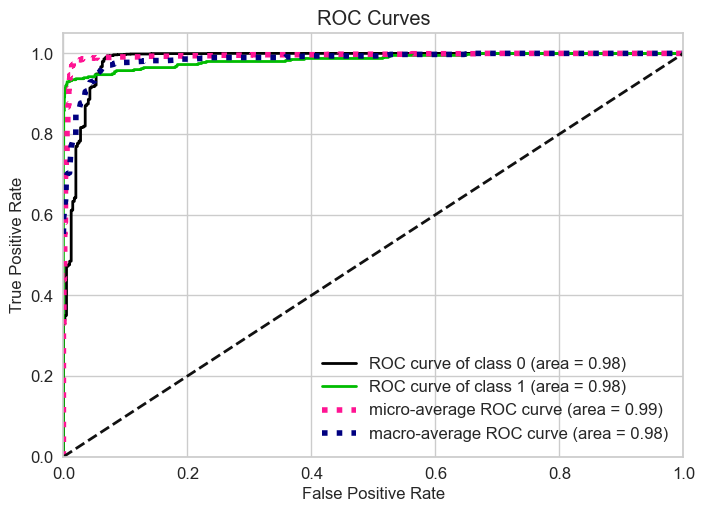

In [190]:
y_pred_proba = lgb.predict_proba(X_test)
plot_roc(y_test, y_pred_proba)
plt.show();

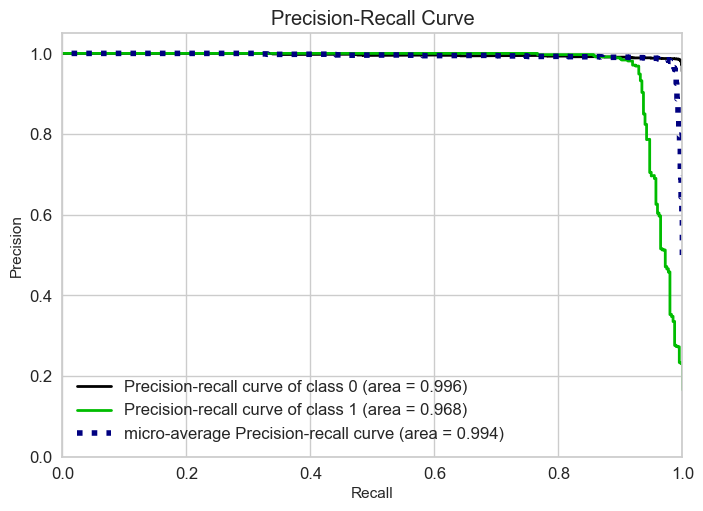

In [191]:
y_pred_proba = lgb.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

**Feature Importance**

In [192]:
lgb_model = lgb.named_steps["LGB"]

# Extracting the one-hot encoded feature names
one_hot_encoded_feature_names = lgb.named_steps['Ordinal_Encoder'].get_feature_names_out(X_train.columns)

# Get feature importances
lgb_features = pd.DataFrame(index=one_hot_encoded_feature_names, data=lgb_model.feature_importances_, columns=['Importance']).sort_values("Importance", ascending=False)

# Print or use the feature importances
print(lgb_features)


                       Importance
average_montly_hours          312
satisfaction_level            279
last_evaluation               276
number_project                187
time_spend_company            185
salary                         41
work_accident                  24
departments                    22
promotion_last_5years           6


#### 4- Support Vector Machines (SVM)

In [193]:
onehot = OneHotEncoder(handle_unknown="ignore", sparse=False)
column_trans = make_column_transformer((onehot, ['departments']),
                                        remainder='passthrough', 
                                        verbose_feature_names_out=False).set_output(transform="pandas") 

In [194]:
operations = [("OneHot_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("sup_vec", SVC(probability=True,random_state=42))]

svc = Pipeline(steps=operations)
svc.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('sup_vec', SVC(probability=True, random_state=42))])

In [195]:
eval_metric(svc, X_train, y_train, X_test, y_test)

Test_Set
[[1949   52]
 [  46  352]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2001
           1       0.87      0.88      0.88       398

    accuracy                           0.96      2399
   macro avg       0.92      0.93      0.93      2399
weighted avg       0.96      0.96      0.96      2399


Train_Set
[[7814  185]
 [ 180 1413]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7999
           1       0.88      0.89      0.89      1593

    accuracy                           0.96      9592
   macro avg       0.93      0.93      0.93      9592
weighted avg       0.96      0.96      0.96      9592



In [ ]:
#grid search for svm

In [196]:
operations = [
    ("OneHot_Encoder", column_trans),
    ("scaler", StandardScaler()),
    ("sup_vec", SVC(probability=True, random_state=42))
]

svc = Pipeline(steps=operations)

# Define the hyperparameters to search for SVC
param_grid = {
    'sup_vec__C': [0.1, 1, 5],
    'sup_vec__kernel': ['linear', 'rbf'],
    'sup_vec__gamma': ['scale', 'auto']
}

# Perform GridSearchCV
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

Best Parameters: {'sup_vec__C': 5, 'sup_vec__gamma': 'scale', 'sup_vec__kernel': 'rbf'}
Best Model: Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('sup_vec', SVC(C=5, probability=True, random_state=42))])


In [ ]:
#cross validation

In [197]:
operations = [
    ("OneHot_Encoder", column_trans),
    ("scaler", StandardScaler()),
    ("sup_vec", SVC(C=5,probability=True, random_state=42))
]

svc = Pipeline(steps=operations)
scores = cross_validate(svc,
                        X_train,
                        y_train,
                        scoring=scoring_metrics,
                        cv = 5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy     0.960
train_accuracy    0.970
test_precision    0.877
train_precision   0.912
test_recall       0.886
train_recall      0.909
test_f1           0.881
train_f1          0.910
test_roc_auc      0.966
train_roc_auc     0.979
dtype: float64

In [198]:
operations = [
    ("OneHot_Encoder", column_trans),
    ("scaler", StandardScaler()),
    ("sup_vec", SVC(C=5,probability=True, random_state=42))
]

svc = Pipeline(steps=operations)
svc.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('sup_vec', SVC(C=5, probability=True, random_state=42))])

In [199]:
y_pred = svc.predict(X_test)
SVM_f1 = f1_score(y_test, y_pred)
SVM_acc = accuracy_score(y_test, y_pred)
SVM_prec = precision_score(y_test, y_pred)
SVM_recall = recall_score(y_test, y_pred)
SVM_auc = roc_auc_score(y_test, y_pred)

In [200]:
eval_metric(svc, X_train, y_train, X_test, y_test)

Test_Set
[[1960   41]
 [  40  358]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2001
           1       0.90      0.90      0.90       398

    accuracy                           0.97      2399
   macro avg       0.94      0.94      0.94      2399
weighted avg       0.97      0.97      0.97      2399


Train_Set
[[7859  140]
 [ 149 1444]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7999
           1       0.91      0.91      0.91      1593

    accuracy                           0.97      9592
   macro avg       0.95      0.94      0.95      9592
weighted avg       0.97      0.97      0.97      9592



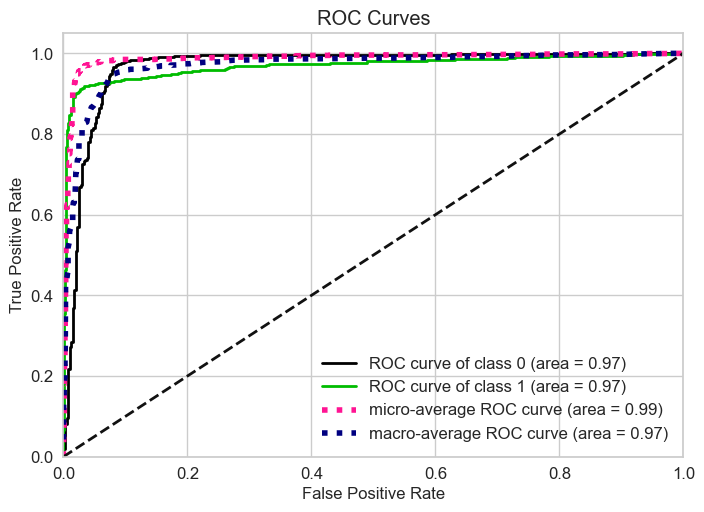

In [201]:
y_pred_proba = svc.predict_proba(X_test)
plot_roc(y_test, y_pred_proba)
plt.show();

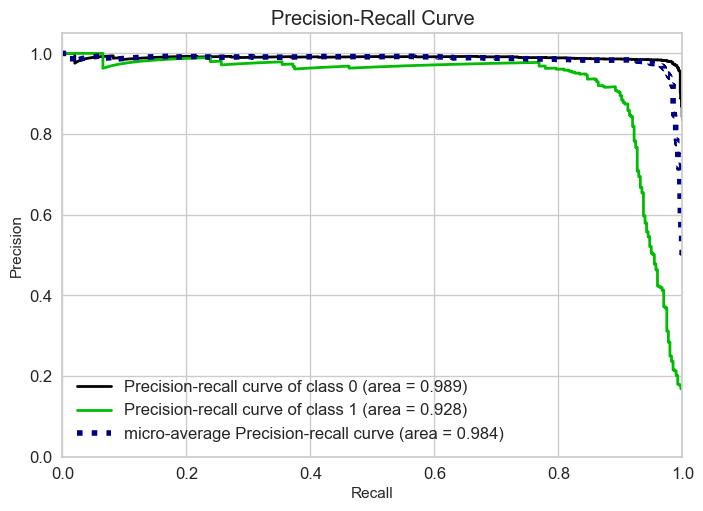

In [202]:
y_pred_proba = svc.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

#### 5- K-Nearest Neighbors (KNN)

In [204]:
operations = [("OneHot_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("k_nearest", KNeighborsClassifier())]

knn = Pipeline(steps=operations)
knn.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('k_nearest', KNeighborsClassifier())])

In [205]:
eval_metric(knn, X_train, y_train, X_test, y_test)

Test_Set
[[1926   75]
 [  41  357]]
              precision    recall  f1-score   support

           0       0.98      0.96      0.97      2001
           1       0.83      0.90      0.86       398

    accuracy                           0.95      2399
   macro avg       0.90      0.93      0.92      2399
weighted avg       0.95      0.95      0.95      2399


Train_Set
[[7809  190]
 [ 176 1417]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7999
           1       0.88      0.89      0.89      1593

    accuracy                           0.96      9592
   macro avg       0.93      0.93      0.93      9592
weighted avg       0.96      0.96      0.96      9592



In [ ]:
#grid search for k-nearest

In [206]:
operations = [
    ("OneHot_Encoder", column_trans),
    ("scaler", StandardScaler()),
    ("k_nearest", KNeighborsClassifier())
]

knn = Pipeline(steps=operations)

param_grid = {
    'k_nearest__n_neighbors': [3, 5, 7],
    'k_nearest__weights': ['uniform', 'distance'],
    'k_nearest__p': [1, 2]
}

# Perform GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

Best Parameters: {'k_nearest__n_neighbors': 7, 'k_nearest__p': 1, 'k_nearest__weights': 'distance'}
Best Model: Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('k_nearest',
                 KNeighborsClassifier(n_neighbors=7, p=1, weights='distance'))])


In [ ]:
#cross validation

In [207]:
operations = [
    ("OneHot_Encoder", column_trans),
    ("scaler", StandardScaler()),
    ("k_nearest", KNeighborsClassifier(n_neighbors=7,p=1, weights='distance'))
]

knn = Pipeline(steps=operations)
scores = cross_validate(knn,
                        X_train,
                        y_train,
                        scoring=scoring_metrics,
                        cv = 5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy     0.952
train_accuracy    1.000
test_precision    0.828
train_precision   1.000
test_recall       0.895
train_recall      1.000
test_f1           0.860
train_f1          1.000
test_roc_auc      0.955
train_roc_auc     1.000
dtype: float64

**There is overfitting, we need to tune!**

In [208]:
operations = [
    ("OneHot_Encoder", column_trans),
    ("scaler", StandardScaler()),
    ("k_nearest", KNeighborsClassifier(n_neighbors=5,p=1,weights='uniform'))
]

knn = Pipeline(steps=operations)
scores = cross_validate(knn,
                        X_train,
                        y_train,
                        scoring=scoring_metrics,
                        cv = 5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy     0.951
train_accuracy    0.961
test_precision    0.829
train_precision   0.871
test_recall       0.886
train_recall      0.897
test_f1           0.857
train_f1          0.884
test_roc_auc      0.950
train_roc_auc     0.992
dtype: float64

In [ ]:
# Now, there is no overfitting!

In [209]:
operations = [("OneHot_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("k_nearest", KNeighborsClassifier(n_neighbors=5,p=1,weights='uniform'))]

knn = Pipeline(steps=operations)
knn.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()),
                ('k_nearest', KNeighborsClassifier(p=1))])

In [210]:
y_pred = knn.predict(X_test)
KNN_f1 = f1_score(y_test, y_pred)
KNN_acc = accuracy_score(y_test, y_pred)
KNN_prec = precision_score(y_test, y_pred)
KNN_recall = recall_score(y_test, y_pred)
KNN_auc = roc_auc_score(y_test, y_pred)

In [211]:
eval_metric(knn, X_train, y_train, X_test, y_test)

Test_Set
[[1931   70]
 [  35  363]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      2001
           1       0.84      0.91      0.87       398

    accuracy                           0.96      2399
   macro avg       0.91      0.94      0.92      2399
weighted avg       0.96      0.96      0.96      2399


Train_Set
[[7800  199]
 [ 165 1428]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      7999
           1       0.88      0.90      0.89      1593

    accuracy                           0.96      9592
   macro avg       0.93      0.94      0.93      9592
weighted avg       0.96      0.96      0.96      9592



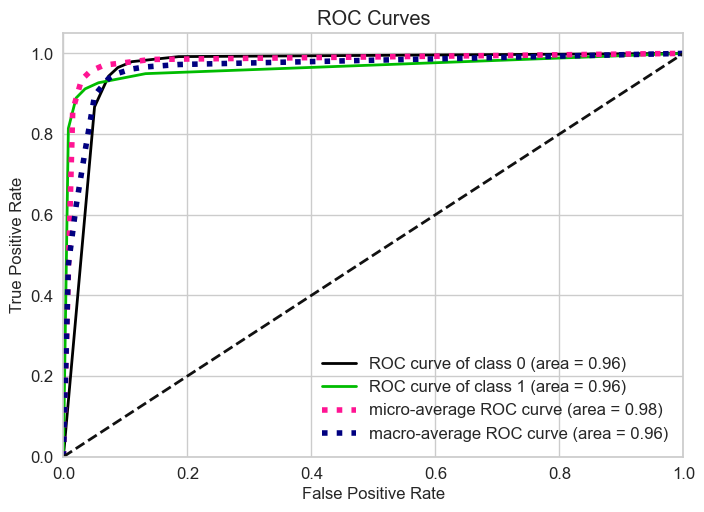

In [212]:
y_pred_proba = knn.predict_proba(X_test)
plot_roc(y_test, y_pred_proba)
plt.show();

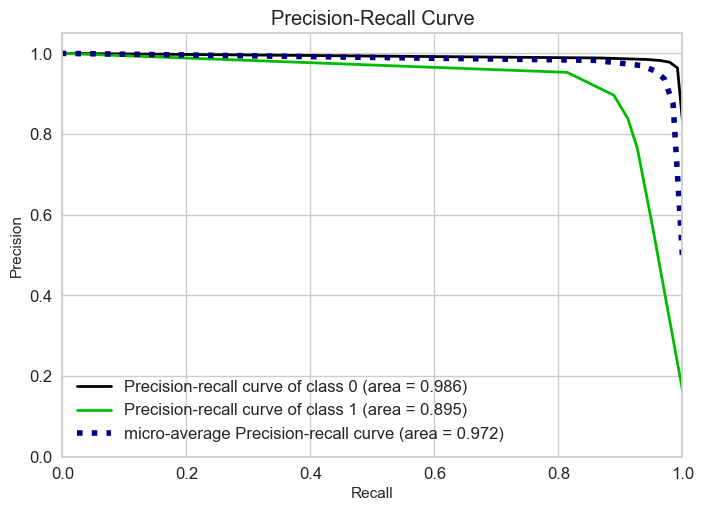

In [213]:
y_pred_proba = knn.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

#### 6- Naive Bayes

In [216]:
# Since the distribution of data is not gaussian, the Naive Bayes gives not good result.

In [215]:
operations = [("OneHot_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("Gaussian", GaussianNB())]

nb = Pipeline(steps=operations)
nb.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()), ('Gaussian', GaussianNB())])

In [217]:
eval_metric(nb, X_train, y_train, X_test, y_test)

Test_Set
[[1740  261]
 [ 113  285]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      2001
           1       0.52      0.72      0.60       398

    accuracy                           0.84      2399
   macro avg       0.73      0.79      0.75      2399
weighted avg       0.87      0.84      0.85      2399


Train_Set
[[6783 1216]
 [ 493 1100]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      7999
           1       0.47      0.69      0.56      1593

    accuracy                           0.82      9592
   macro avg       0.70      0.77      0.73      9592
weighted avg       0.86      0.82      0.83      9592



In [ ]:
#grid search for Naive Bayes

**Since Gaussian Naive Bayes doesn't have many hyperparameters to tune, we don't need an extensive grid search.**

In [218]:
operations = [
    ("OneHot_Encoder", column_trans),
    ("scaler", StandardScaler()),
    ("Gaussian", GaussianNB())
]

nb = Pipeline(steps=operations)

param_grid = {
    'Gaussian__var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Perform GridSearchCV
grid_search = GridSearchCV(nb, param_grid, cv=5, scoring='recall')
grid_search.fit(X_train, y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Model:", best_model)

Best Parameters: {'Gaussian__var_smoothing': 1e-09}
Best Model: Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()), ('Gaussian', GaussianNB())])


In [ ]:
#cross validation

In [219]:
operations = [("OneHot_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("Gaussian", GaussianNB())]

nb = Pipeline(steps=operations)
scores = cross_validate(nb,
                        X_train,
                        y_train,
                        scoring=scoring_metrics,
                        cv = 5,
                        return_train_score=True)
df_scores = pd.DataFrame(scores)
df_scores.mean()[2:]

test_accuracy     0.817
train_accuracy    0.817
test_precision    0.466
train_precision   0.465
test_recall       0.688
train_recall      0.689
test_f1           0.555
train_f1          0.555
test_roc_auc      0.822
train_roc_auc     0.828
dtype: float64

In [220]:
#final model

In [221]:
operations = [("OneHot_Encoder", column_trans), 
              ("scaler", StandardScaler()), 
              ("Gaussian", GaussianNB())]

nb = Pipeline(steps=operations)
nb.fit(X_train, y_train)

Pipeline(steps=[('OneHot_Encoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False),
                                                  ['departments'])],
                                   verbose_feature_names_out=False)),
                ('scaler', StandardScaler()), ('Gaussian', GaussianNB())])

In [222]:
y_pred = nb.predict(X_test)
Naive_Bayes_f1 = f1_score(y_test, y_pred)
Naive_Bayes_acc = accuracy_score(y_test, y_pred)
Naive_Bayes_prec = precision_score(y_test, y_pred)
Naive_Bayes_recall = recall_score(y_test, y_pred)
Naive_Bayes_auc = roc_auc_score(y_test, y_pred)

In [223]:
eval_metric(nb, X_train, y_train, X_test, y_test)

Test_Set
[[1740  261]
 [ 113  285]]
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      2001
           1       0.52      0.72      0.60       398

    accuracy                           0.84      2399
   macro avg       0.73      0.79      0.75      2399
weighted avg       0.87      0.84      0.85      2399


Train_Set
[[6783 1216]
 [ 493 1100]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      7999
           1       0.47      0.69      0.56      1593

    accuracy                           0.82      9592
   macro avg       0.70      0.77      0.73      9592
weighted avg       0.86      0.82      0.83      9592



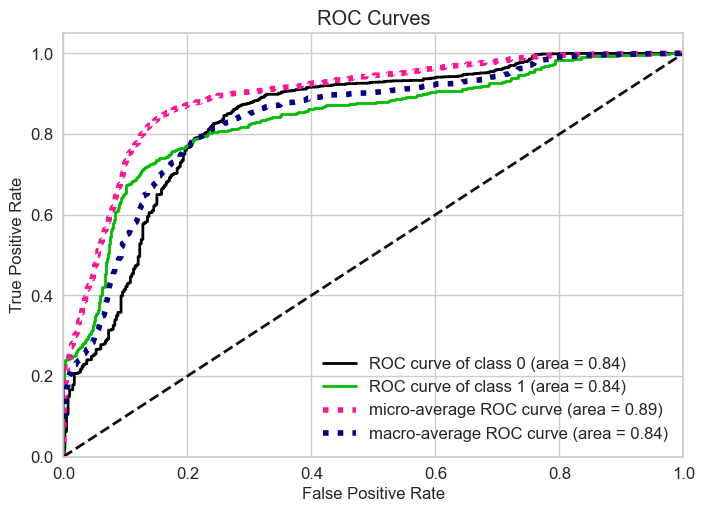

In [224]:
y_pred_proba = nb.predict_proba(X_test)
plot_roc(y_test, y_pred_proba)
plt.show();

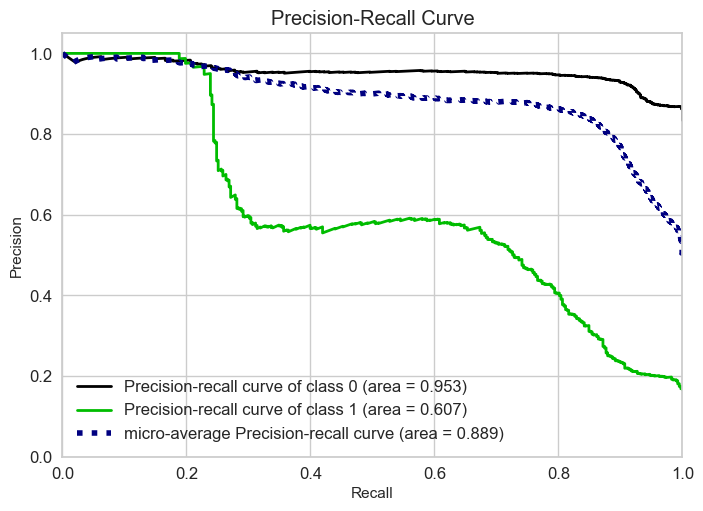

In [225]:
y_pred_proba = nb.predict_proba(X_test)
plot_precision_recall(y_test, y_pred_proba)
plt.show();

#### 7- Neural Networks: Deep Learning

In [226]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping

In [227]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [228]:
#validation_split=0.1 balanced data
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.2, random_state=42)

In [247]:
pipeline = Pipeline([
    ("onehot", column_trans),
    ("scaler", StandardScaler()),  
])

# Fit the scaler on training data and transform both training and testing data
X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)
X_val_scaled = pipeline.fit_transform(X_val)

In [248]:
model = Sequential()
model.add(Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=tf.keras.metrics.Recall(name='recall'))


In [249]:
model.summary()

Model: "sequential_51"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_204 (Dense)           (None, 128)               2432      
                                                                 
 batch_normalization_153 (Ba  (None, 128)              512       
 tchNormalization)                                               
                                                                 
 dropout_153 (Dropout)       (None, 128)               0         
                                                                 
 dense_205 (Dense)           (None, 64)                8256      
                                                                 
 batch_normalization_154 (Ba  (None, 64)               256       
 tchNormalization)                                               
                                                                 
 dropout_154 (Dropout)       (None, 64)              

In [250]:
early_stop1 = EarlyStopping(monitor = "recall", mode = "max", verbose = 1, patience = 20,restore_best_weights=True)

In [251]:
model.fit(x=X_train_scaled, y=y_train, epochs=200, batch_size=16, validation_data=(X_val_scaled, y_val),callbacks = [early_stop1], verbose=1)

Epoch 1/200
480/480 [==============================] - 2s 3ms/step - loss: 0.4714 - recall: 0.4874 - val_loss: 0.2097 - val_recall: 0.8056
Epoch 2/200
480/480 [==============================] - 1s 3ms/step - loss: 0.3042 - recall: 0.5118 - val_loss: 0.1800 - val_recall: 0.8119
Epoch 3/200
480/480 [==============================] - 1s 3ms/step - loss: 0.2591 - recall: 0.5628 - val_loss: 0.1601 - val_recall: 0.8589
Epoch 4/200
480/480 [==============================] - 1s 3ms/step - loss: 0.2357 - recall: 0.6601 - val_loss: 0.1451 - val_recall: 0.8715
Epoch 5/200
480/480 [==============================] - 1s 3ms/step - loss: 0.2236 - recall: 0.6452 - val_loss: 0.1405 - val_recall: 0.9060
Epoch 6/200
480/480 [==============================] - 1s 3ms/step - loss: 0.2139 - recall: 0.6994 - val_loss: 0.1396 - val_recall: 0.9122
Epoch 7/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1959 - recall: 0.7363 - val_loss: 0.1309 - val_recall: 0.8997
Epoch 8/200
480/480 [======

480/480 [==============================] - 1s 3ms/step - loss: 0.1216 - recall: 0.8532 - val_loss: 0.1056 - val_recall: 0.9122
Epoch 60/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1198 - recall: 0.8728 - val_loss: 0.1021 - val_recall: 0.9091
Epoch 61/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1175 - recall: 0.8673 - val_loss: 0.1060 - val_recall: 0.9154
Epoch 62/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1142 - recall: 0.8611 - val_loss: 0.1027 - val_recall: 0.9154
Epoch 63/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1178 - recall: 0.8705 - val_loss: 0.1004 - val_recall: 0.9122
Epoch 64/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1165 - recall: 0.8705 - val_loss: 0.0987 - val_recall: 0.9091
Epoch 65/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1159 - recall: 0.8673 - val_loss: 0.1000 - val_recall: 0.9122
Epoch 66/200
480/480 [===========

In [252]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail()

loss  recall  val_loss  val_recall
104 0.102   0.885     0.095       0.903
105 0.110   0.871     0.096       0.912
106 0.111   0.878     0.096       0.909
107 0.105   0.881     0.097       0.909
108 0.101   0.882     0.100       0.903

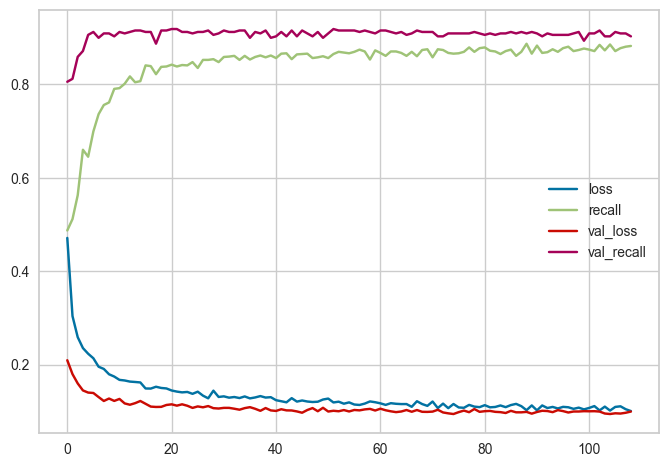

In [253]:
loss_df.plot()
plt.show()

In [254]:
# Evaluate the model on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba >= 0.5).astype(int)

75/75 [==============================] - 0s 1ms/step


In [255]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      2001
           1       0.95      0.91      0.93       398

    accuracy                           0.98      2399
   macro avg       0.96      0.95      0.96      2399
weighted avg       0.98      0.98      0.98      2399



In [256]:
# Evaluate the model on the test set
y_pred_proba2 = model.predict(X_train_scaled)
y_pred2 = (y_pred_proba2 >= 0.5).astype(int)

240/240 [==============================] - 0s 1ms/step


In [240]:
print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6399
           1       0.96      0.91      0.93      1274

    accuracy                           0.98      7673
   macro avg       0.97      0.95      0.96      7673
weighted avg       0.98      0.98      0.98      7673



**Hyperparameter optimization using Optuna**

In [257]:
import optuna

In [258]:
# Optuna optimization function
def objective(trial):
    # Define the Keras model function with hyperparameters suggested by Optuna
    def create_model(trial):
        model = Sequential()
        model.add(Dense(trial.suggest_int('neurons_layer1', 32, 256), input_dim=X_train_scaled.shape[1], activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(trial.suggest_uniform('dropout_rate1', 0.0, 0.5)))
        model.add(Dense(trial.suggest_int('neurons_layer2', 32, 128), activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(trial.suggest_uniform('dropout_rate2', 0.0, 0.5)))
        model.add(Dense(trial.suggest_int('neurons_layer3', 16, 64), activation='relu'))
        model.add(BatchNormalization())
        model.add(Dropout(trial.suggest_uniform('dropout_rate3', 0.0, 0.5)))
        model.add(Dense(1, activation='sigmoid'))
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=[tf.keras.metrics.Recall(name='recall')])
        return model

    # Split the data into training and validation sets
    X_train_optuna, X_val_optuna, y_train_optuna, y_val_optuna = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

    # Create the Keras model
    model = create_model(trial)

    # Train the model
    model.fit(X_train_optuna, y_train_optuna, epochs=10, batch_size=32, validation_data=(X_val_optuna, y_val_optuna), verbose=0)

    # Evaluate the model on the validation set
    accuracy = model.evaluate(X_val_optuna, y_val_optuna, verbose=0)[1]

    # Return the metric to be optimized (in this case, validation accuracy)
    return accuracy

In [259]:
# Perform the hyperparameter optimization using Optuna
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

[I 2024-01-11 10:00:07,186] A new study created in memory with name: no-name-738cfb82-6f8e-48a4-906f-e35452af1f01
[I 2024-01-11 10:00:13,984] Trial 0 finished with value: 0.8790322542190552 and parameters: {'neurons_layer1': 190, 'dropout_rate1': 0.12564147502429268, 'neurons_layer2': 107, 'dropout_rate2': 0.3378137216174317, 'neurons_layer3': 32, 'dropout_rate3': 0.27705910170254955}. Best is trial 0 with value: 0.8790322542190552.
[I 2024-01-11 10:00:20,467] Trial 1 finished with value: 0.875 and parameters: {'neurons_layer1': 84, 'dropout_rate1': 0.4038368916194601, 'neurons_layer2': 80, 'dropout_rate2': 0.46095834002371533, 'neurons_layer3': 40, 'dropout_rate3': 0.39926210147896585}. Best is trial 0 with value: 0.8790322542190552.
[I 2024-01-11 10:00:27,908] Trial 2 finished with value: 0.8790322542190552 and parameters: {'neurons_layer1': 184, 'dropout_rate1': 0.36900084576594755, 'neurons_layer2': 119, 'dropout_rate2': 0.07581075334709075, 'neurons_layer3': 39, 'dropout_rate3': 0

[I 2024-01-11 10:03:23,106] Trial 26 finished with value: 0.8911290168762207 and parameters: {'neurons_layer1': 158, 'dropout_rate1': 0.35143341408672996, 'neurons_layer2': 127, 'dropout_rate2': 0.29273006138037344, 'neurons_layer3': 56, 'dropout_rate3': 0.16988173636325574}. Best is trial 12 with value: 0.9032257795333862.
[I 2024-01-11 10:03:30,145] Trial 27 finished with value: 0.8951612710952759 and parameters: {'neurons_layer1': 50, 'dropout_rate1': 0.49674368651954554, 'neurons_layer2': 117, 'dropout_rate2': 0.14840140439176475, 'neurons_layer3': 44, 'dropout_rate3': 0.21398403566883084}. Best is trial 12 with value: 0.9032257795333862.
[I 2024-01-11 10:03:37,495] Trial 28 finished with value: 0.8951612710952759 and parameters: {'neurons_layer1': 207, 'dropout_rate1': 0.41090804683022614, 'neurons_layer2': 77, 'dropout_rate2': 0.21851226110026484, 'neurons_layer3': 60, 'dropout_rate3': 0.26542941034381307}. Best is trial 12 with value: 0.9032257795333862.
[I 2024-01-11 10:03:44,8

In [260]:
# Get the best parameters
best_params = study.best_params
print("Best Parameters:", best_params)

Best Parameters: {'neurons_layer1': 59, 'dropout_rate1': 0.29603207908898926, 'neurons_layer2': 104, 'dropout_rate2': 0.25169376064076615, 'neurons_layer3': 52, 'dropout_rate3': 0.16570577587704702}


In [261]:
model = Sequential()
model.add(Dense(59, input_dim=X_train_scaled.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.29603207908898926))
model.add(Dense(104, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25169376064076615))
model.add(Dense(52, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.16570577587704702))

model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=tf.keras.metrics.Recall(name='recall'))


In [262]:
model.fit(x=X_train_scaled, y=y_train, epochs=200, batch_size=16, validation_data=(X_val_scaled,y_val),callbacks = [early_stop1], verbose=1)

Epoch 1/200
480/480 [==============================] - 2s 3ms/step - loss: 0.4344 - recall: 0.4882 - val_loss: 0.2093 - val_recall: 0.7900
Epoch 2/200
480/480 [==============================] - 1s 3ms/step - loss: 0.2822 - recall: 0.5502 - val_loss: 0.1732 - val_recall: 0.8433
Epoch 3/200
480/480 [==============================] - 1s 3ms/step - loss: 0.2477 - recall: 0.6154 - val_loss: 0.1565 - val_recall: 0.8621
Epoch 4/200
480/480 [==============================] - 1s 3ms/step - loss: 0.2299 - recall: 0.6743 - val_loss: 0.1452 - val_recall: 0.8903
Epoch 5/200
480/480 [==============================] - 1s 3ms/step - loss: 0.2088 - recall: 0.7033 - val_loss: 0.1502 - val_recall: 0.9091
Epoch 6/200
480/480 [==============================] - 1s 3ms/step - loss: 0.2095 - recall: 0.7245 - val_loss: 0.1448 - val_recall: 0.9185
Epoch 7/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1877 - recall: 0.7449 - val_loss: 0.1375 - val_recall: 0.8966
Epoch 8/200
480/480 [======

480/480 [==============================] - 1s 3ms/step - loss: 0.1155 - recall: 0.8658 - val_loss: 0.1046 - val_recall: 0.9060
Epoch 60/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1095 - recall: 0.8736 - val_loss: 0.0987 - val_recall: 0.9028
Epoch 61/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1127 - recall: 0.8689 - val_loss: 0.1013 - val_recall: 0.9028
Epoch 62/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1106 - recall: 0.8752 - val_loss: 0.0906 - val_recall: 0.8997
Epoch 63/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1138 - recall: 0.8744 - val_loss: 0.0962 - val_recall: 0.9091
Epoch 64/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1067 - recall: 0.8705 - val_loss: 0.0971 - val_recall: 0.9091
Epoch 65/200
480/480 [==============================] - 1s 3ms/step - loss: 0.1129 - recall: 0.8650 - val_loss: 0.0962 - val_recall: 0.9122
Epoch 66/200
480/480 [===========

In [263]:
loss_df = pd.DataFrame(model.history.history)
loss_df.tail()

loss  recall  val_loss  val_recall
85 0.104   0.884     0.102       0.909
86 0.108   0.876     0.096       0.906
87 0.108   0.874     0.097       0.906
88 0.106   0.880     0.102       0.903
89 0.113   0.865     0.096       0.906

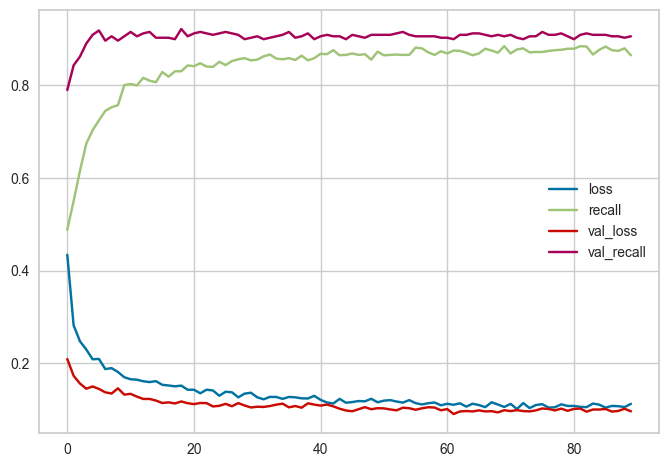

In [264]:
loss_df.plot()
plt.show()

In [265]:
# Evaluate the model on the test set
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba >= 0.5).astype(int)

75/75 [==============================] - 0s 1ms/step


In [266]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2001
           1       0.93      0.91      0.92       398

    accuracy                           0.97      2399
   macro avg       0.96      0.95      0.95      2399
weighted avg       0.97      0.97      0.97      2399



In [268]:
y_pred_proba2 = model.predict(X_train_scaled)
y_pred2 = (y_pred_proba2 >= 0.5).astype(int)

240/240 [==============================] - 0s 1ms/step


In [269]:
print(classification_report(y_train, y_pred2))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6399
           1       0.95      0.91      0.93      1274

    accuracy                           0.98      7673
   macro avg       0.97      0.95      0.96      7673
weighted avg       0.98      0.98      0.98      7673



In [270]:
y_pred_proba = model.predict(X_test_scaled)
y_pred = (y_pred_proba >= 0.5).astype(int)

Deep_Learning_f1 = f1_score(y_test, y_pred)
Deep_Learning_acc = accuracy_score(y_test, y_pred)
Deep_Learning_prec = precision_score(y_test, y_pred)
Deep_Learning_recall = recall_score(y_test, y_pred)
Deep_Learning_auc = roc_auc_score(y_test, y_pred)

75/75 [==============================] - 0s 1ms/step


In [271]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

75/75 [==============================] - 0s 1ms/step


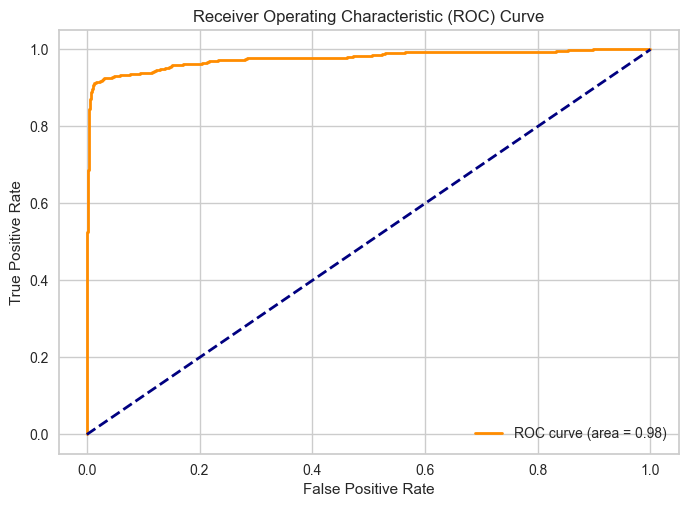

In [272]:
y_pred_proba = model.predict(X_test_scaled)
# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

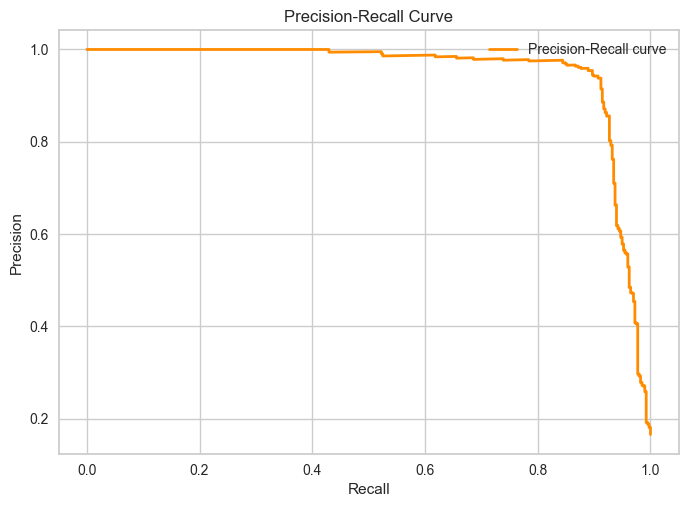

In [273]:
# Plot Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_proba)

plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.show()

## Model Comparison

In [274]:
compare = pd.DataFrame({"Model": ["Log_Reg","Rand_Forest","Rand_Forest_5", "XGBoost", "LightGBM", "SVM","KNN","Naive_Bayes","Deep_Learning"],
                        "f1_score": [log_reg_f1, random_forest_f1, random_forest5_f1, XGB_f1, LGB_f1,SVM_f1,KNN_f1,Naive_Bayes_f1,Deep_Learning_f1],
                        "accuracy": [log_reg_acc, random_forest_acc, random_forest5_acc, XGB_acc, LGB_acc,SVM_acc,KNN_acc,Naive_Bayes_acc,Deep_Learning_acc],
                        "precision": [log_reg_prec, random_forest_prec, random_forest5_prec, XGB_prec, LGB_prec,SVM_prec,KNN_prec,Naive_Bayes_prec,Deep_Learning_prec],
                        "recall": [log_reg_recall, random_forest_recall, random_forest5_recall, XGB_recall, LGB_recall,SVM_recall,KNN_recall,Naive_Bayes_recall,Deep_Learning_recall],
                        "roc_auc": [log_reg_auc, random_forest_auc, random_forest5_auc, XGB_auc, LGB_auc,SVM_auc,KNN_auc,Naive_Bayes_auc,Deep_Learning_auc]})
compare

Model  f1_score  accuracy  precision  recall  roc_auc
0        Log_Reg     0.558     0.776      0.414   0.852    0.806
1    Rand_Forest     0.956     0.986      0.989   0.925    0.961
2  Rand_Forest_5     0.956     0.986      0.987   0.927    0.962
3        XGBoost     0.944     0.982      0.956   0.932    0.962
4       LightGBM     0.940     0.980      0.951   0.930    0.960
5            SVM     0.898     0.966      0.897   0.899    0.940
6            KNN     0.874     0.956      0.838   0.912    0.939
7    Naive_Bayes     0.604     0.844      0.522   0.716    0.793
8  Deep_Learning     0.920     0.974      0.928   0.912    0.949

In [275]:
compare.sort_values(by="recall", ascending=False)

Model  f1_score  accuracy  precision  recall  roc_auc
3        XGBoost     0.944     0.982      0.956   0.932    0.962
4       LightGBM     0.940     0.980      0.951   0.930    0.960
2  Rand_Forest_5     0.956     0.986      0.987   0.927    0.962
1    Rand_Forest     0.956     0.986      0.989   0.925    0.961
6            KNN     0.874     0.956      0.838   0.912    0.939
8  Deep_Learning     0.920     0.974      0.928   0.912    0.949
5            SVM     0.898     0.966      0.897   0.899    0.940
0        Log_Reg     0.558     0.776      0.414   0.852    0.806
7    Naive_Bayes     0.604     0.844      0.522   0.716    0.793

In [276]:
compare.sort_values(by="roc_auc", ascending=False)

Model  f1_score  accuracy  precision  recall  roc_auc
2  Rand_Forest_5     0.956     0.986      0.987   0.927    0.962
3        XGBoost     0.944     0.982      0.956   0.932    0.962
1    Rand_Forest     0.956     0.986      0.989   0.925    0.961
4       LightGBM     0.940     0.980      0.951   0.930    0.960
8  Deep_Learning     0.920     0.974      0.928   0.912    0.949
5            SVM     0.898     0.966      0.897   0.899    0.940
6            KNN     0.874     0.956      0.838   0.912    0.939
0        Log_Reg     0.558     0.776      0.414   0.852    0.806
7    Naive_Bayes     0.604     0.844      0.522   0.716    0.793

In [277]:
compare.sort_values(by="f1_score", ascending=False)

Model  f1_score  accuracy  precision  recall  roc_auc
2  Rand_Forest_5     0.956     0.986      0.987   0.927    0.962
1    Rand_Forest     0.956     0.986      0.989   0.925    0.961
3        XGBoost     0.944     0.982      0.956   0.932    0.962
4       LightGBM     0.940     0.980      0.951   0.930    0.960
8  Deep_Learning     0.920     0.974      0.928   0.912    0.949
5            SVM     0.898     0.966      0.897   0.899    0.940
6            KNN     0.874     0.956      0.838   0.912    0.939
7    Naive_Bayes     0.604     0.844      0.522   0.716    0.793
0        Log_Reg     0.558     0.776      0.414   0.852    0.806

In [286]:
# plt.figure(figsize=(14, 16))

# # F1 Score
# plt.subplot(511)
# compare_f1 = compare.sort_values(by="f1_score", ascending=False)
# ax = sns.barplot(x="f1_score", y="Model", data=compare_f1, palette="Blues_d")
# ax.bar_label(ax.containers[0], fmt="%.4f")
# plt.title('F1 Score')

# # Accuracy
# plt.subplot(512)
# compare_acc = compare.sort_values(by="accuracy", ascending=False)
# ax = sns.barplot(x="accuracy", y="Model", data=compare_acc, palette="Blues_d")
# ax.bar_label(ax.containers[0], fmt="%.4f")
# plt.title('Accuracy')

# # Precision
# plt.subplot(513)
# compare_prec = compare.sort_values(by="precision", ascending=False)
# ax = sns.barplot(x="precision", y="Model", data=compare_prec, palette="Blues_d")
# ax.bar_label(ax.containers[0], fmt="%.4f")
# plt.title('Precision')

# # Recall
# plt.subplot(514)
# compare_recall = compare.sort_values(by="recall", ascending=False)
# ax = sns.barplot(x="recall", y="Model", data=compare_recall, palette="Blues_d")
# ax.bar_label(ax.containers[0], fmt="%.4f")
# plt.title('Recall')

# # roc_auc
# plt.subplot(515)
# compare_roc_auc = compare.sort_values(by="roc_auc", ascending=False)
# ax = sns.barplot(x="roc_auc", y="Model", data=compare_roc_auc, palette="Blues_d")
# ax.bar_label(ax.containers[0], fmt="%.4f")
# plt.title('ROC AUC')

# plt.tight_layout()
# plt.show()

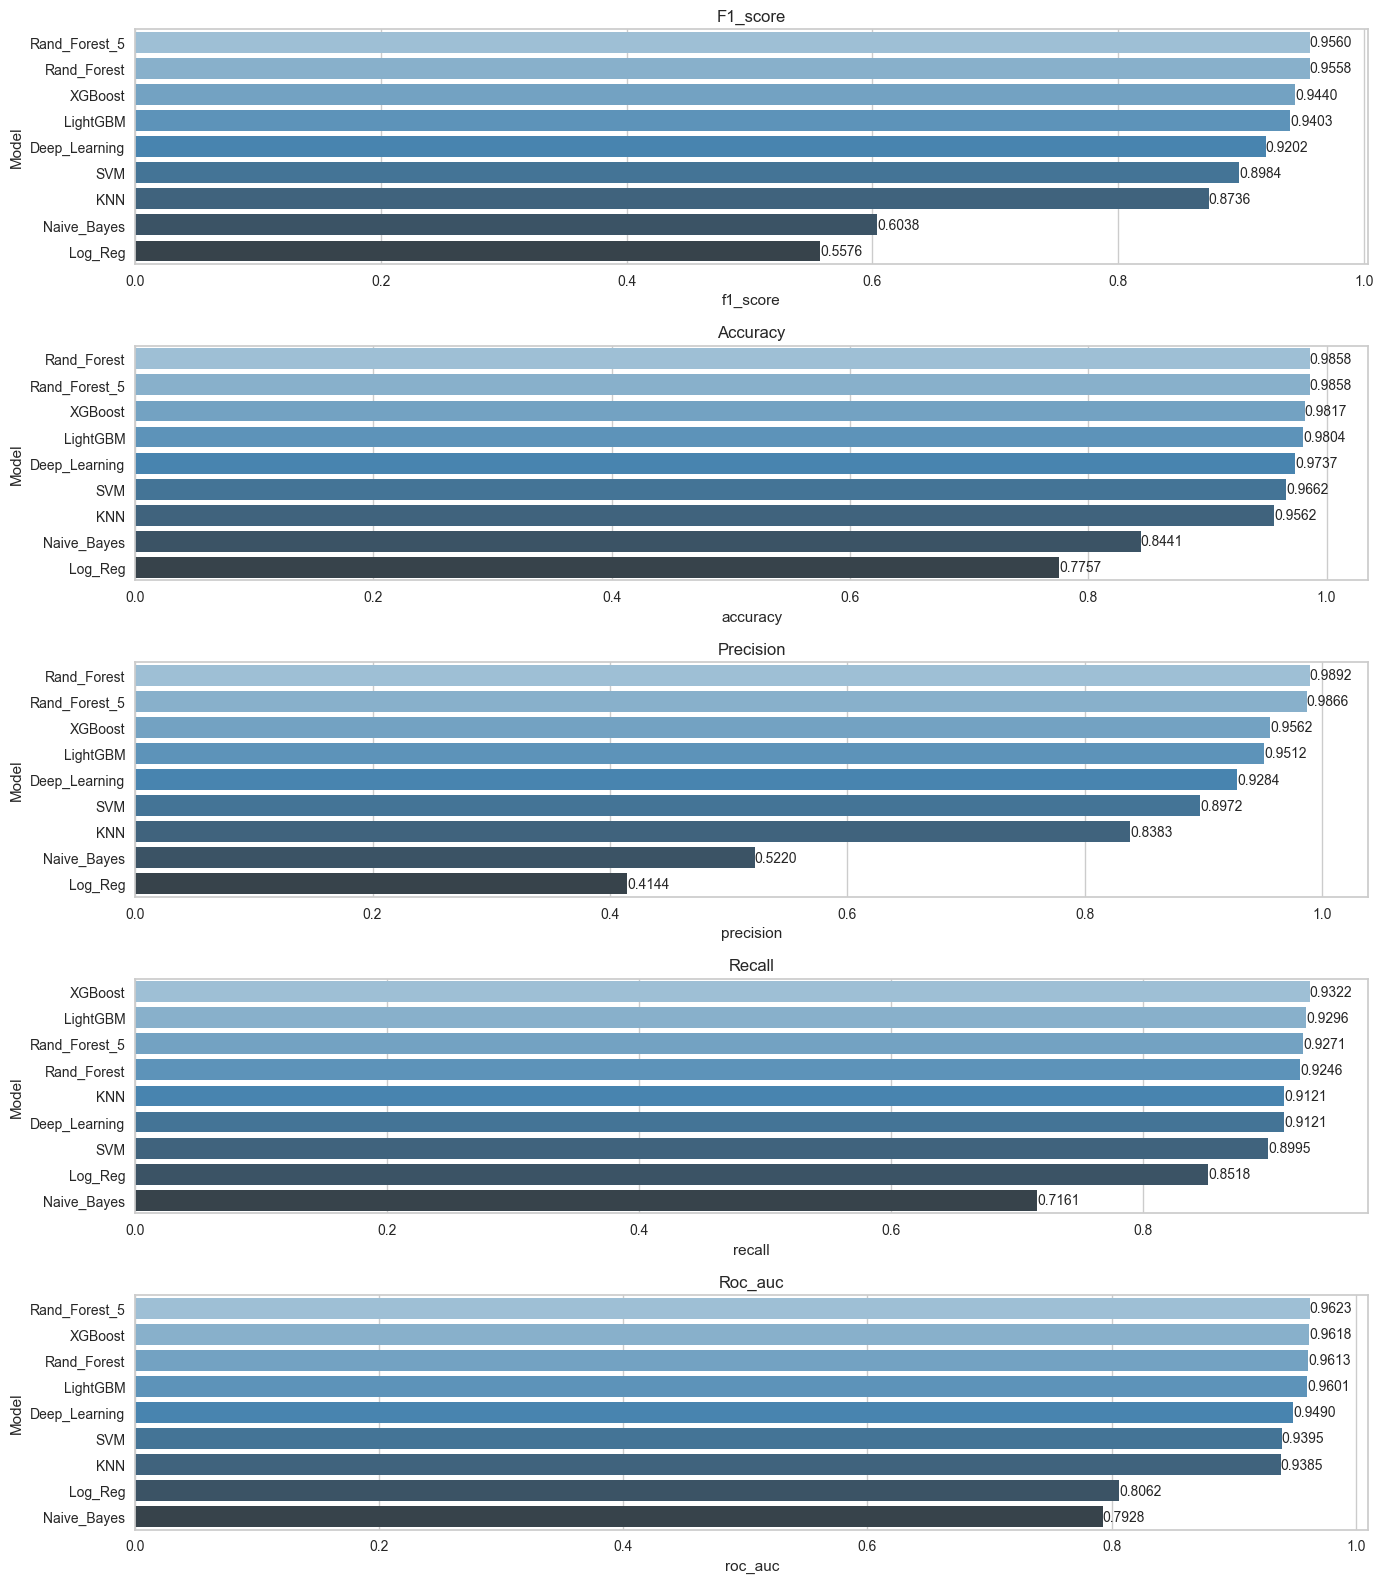

In [288]:
# Set up the subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(14, 16))

# Metrics to plot
metrics = ["f1_score", "accuracy", "precision", "recall", "roc_auc"]

for i, metric in enumerate(metrics):
    # Sort the DataFrame by the current metric in descending order
    compare_metric = compare.sort_values(by=metric, ascending=False)
    
    # Create a bar plot for the current metric
    ax = sns.barplot(x=metric, y="Model", data=compare_metric, palette="Blues_d", ax=axes[i])
    
    # Add labels to each bar in the plot
    for container in ax.containers:
        ax.bar_label(container, fmt="%.4f", label_type='edge', fontsize=10)  # Use 'edge' for outside labels
    
    # Set title for the subplot
    axes[i].set_title(metric.capitalize())

# Adjust layout
plt.tight_layout()
plt.show()

**I choose Random Forest model with 5 features.**

### Final Model

In [289]:
X5 = X[['satisfaction_level','number_project','time_spend_company','average_montly_hours','last_evaluation']]

In [290]:
# Train the model with all data

In [291]:
operations = [("scaler", StandardScaler()), 
              ("rand_forest", RandomForestClassifier(max_depth=10,min_samples_split=2,n_estimators=200,random_state=42))]

final_model = Pipeline(steps=operations)
final_model.fit(X5, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('rand_forest',
                 RandomForestClassifier(max_depth=10, n_estimators=200,
                                        random_state=42))])

In [292]:
# Evaluate the model on the test set
y_predicted = final_model.predict(X5)
print(classification_report(y,y_predicted))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99     10000
           1       0.99      0.93      0.96      1991

    accuracy                           0.99     11991
   macro avg       0.99      0.97      0.98     11991
weighted avg       0.99      0.99      0.99     11991



## 6. Model Deployement

You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied. Streamlit is a popular open source framework used by data scientists for model distribution.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to new .py file and create your web app with Streamlit.

### Save and Export the Best Model

In [293]:
import joblib

In [294]:
# Save the model
joblib.dump(final_model, 'final_model.joblib')

['final_model.joblib']

In [295]:
# Load the model
loaded_model = joblib.load('final_model.joblib')

In [296]:
# Example for prediction
data = [[0.7, 4, 3, 160, 0.9]]
prediction = loaded_model.predict(data)
print("Prediction:", prediction)

Prediction: [0]


### Deployment

https://employee-churn-prediction-sc.streamlit.app/

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___